# Import Libraries

In [174]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math 
from numpy import asarray
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
plt.rcParams.update({'figure.figsize':(30,15), 'font.size': 14})

# Data importing

The used data is about medical insurance company in the US.

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**The dataset has 6 depandent columns that are used to determine the the target column charges.**

# Data Cleaning

Look into the data if it have any null/ duplicated/outliers values.

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.loc[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


**The data is a realworld observation and the duplicate is not significant,therefore it wont be dropped beacuse it may occure in real life.**

# Expolarty Data Analysis 

# Gender

In [8]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

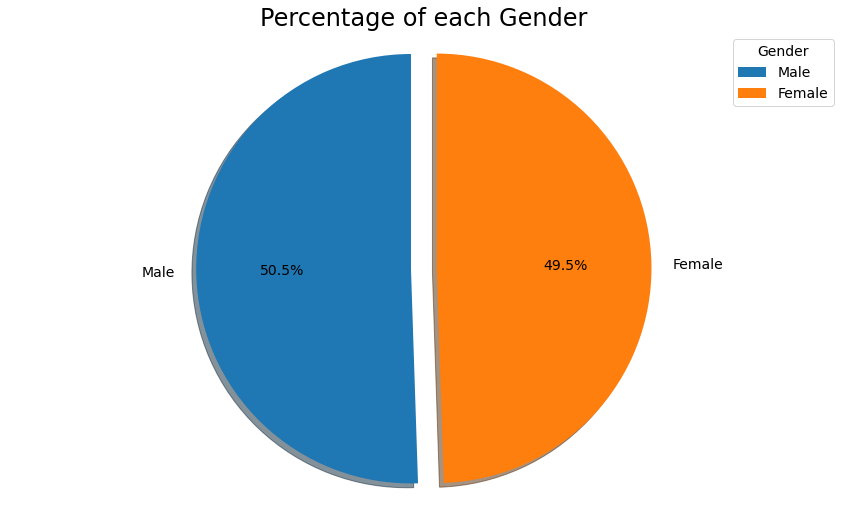

In [9]:
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df.sex.value_counts(), explode = (0.05, 0.07) ,labels=['Male','Female'], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Percentage of each Gender',fontsize=24)
plt.legend(title='Gender')
plt.show()

### The percentage of Females and males in data is close.



# Smoking

In [10]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

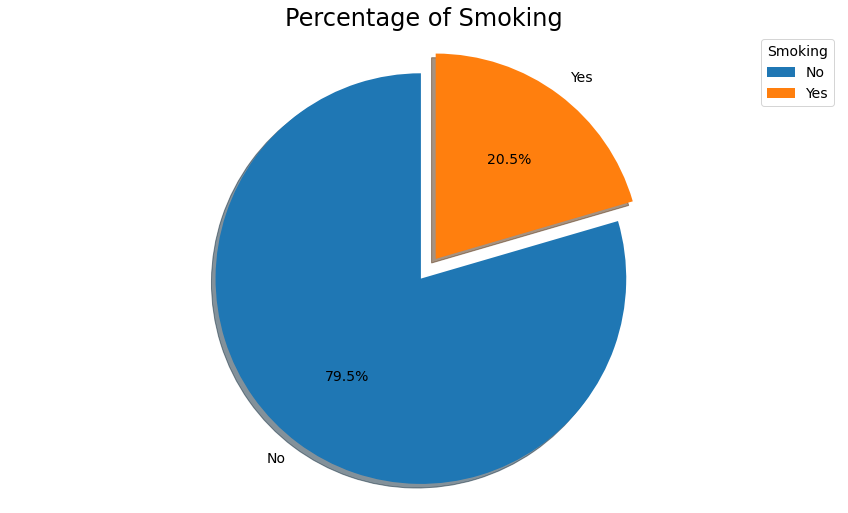

In [11]:
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['smoker'].value_counts(), explode = (0.05, 0.07) ,labels=['No','Yes'], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Percentage of Smoking',fontsize=24)
plt.legend (title="Smoking")
plt.show()

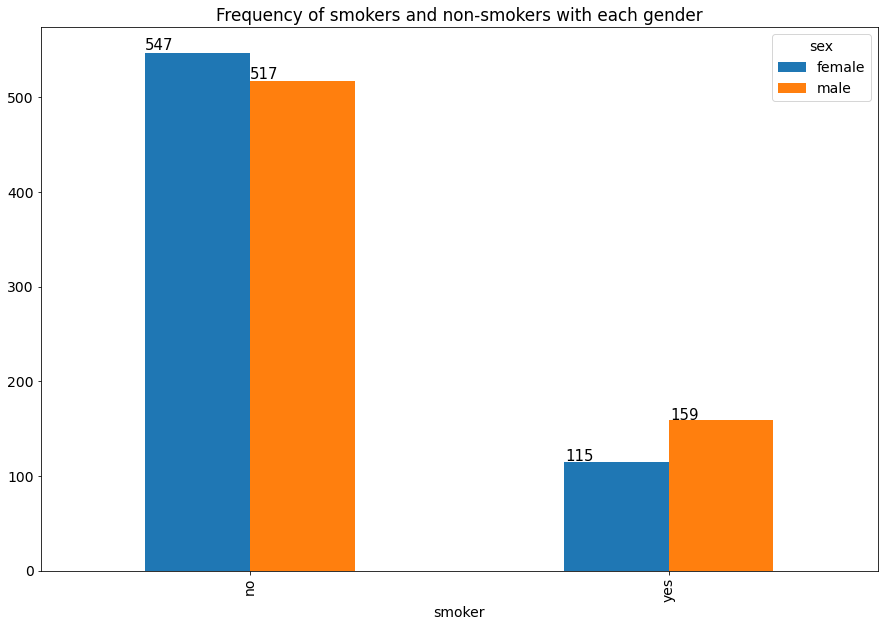

In [12]:
CrosstabResult=pd.crosstab(index=df['smoker'],columns=df['sex'])
ax = CrosstabResult.plot.bar(figsize=(15,10),title='Frequency of smokers and non-smokers with each gender')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=15)

## Insights
### The majorty of data samples are non-smokers with a percentage of 79.5%.
### Males are more likely to be smokers then females.


# Region

In [13]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

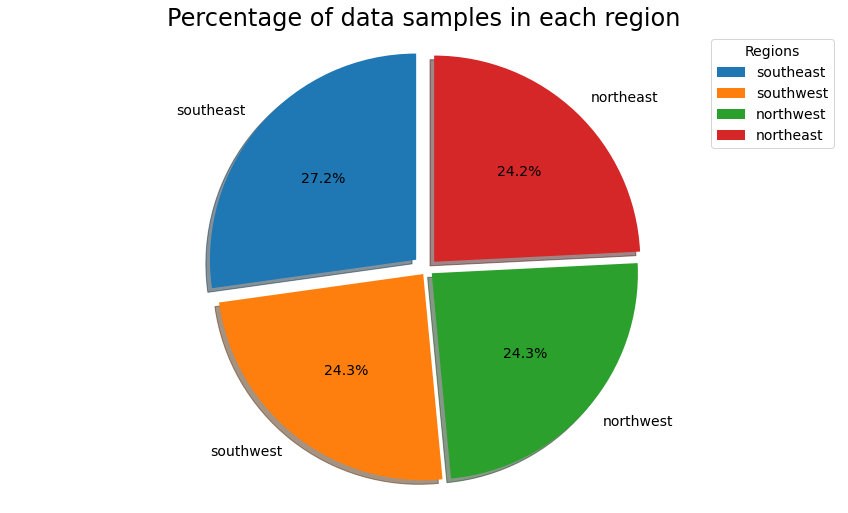

In [14]:
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['region'].value_counts(), explode = (0.07,0.03,0.03,0.05) ,labels=['southeast','southwest','northwest','northeast'], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Percentage of data samples in each region',fontsize=24)
plt.legend (title="Regions")
plt.show()

## Insights
### The population is disturbuted in four regions (southeast, southwest, northeast, northwest).
### The highest concetration of data is in the southeast region.
### In second come the southwest and northwest regions.
### The lowest samples are in northeast.

## The categorical colums(sex,region) in the dataset are almost balanced. Where the smoker column is imbalanced (The majorty od data samples are non-smokers).

# Age

In [15]:
df[['age']].describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [16]:
age = df['age'].value_counts()
age = age.to_frame().reset_index()
age.columns = ['age', 'count']
age.sort_values('age', inplace=True)

In [17]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i]-0.4,y[i],y[i],fontsize=20)

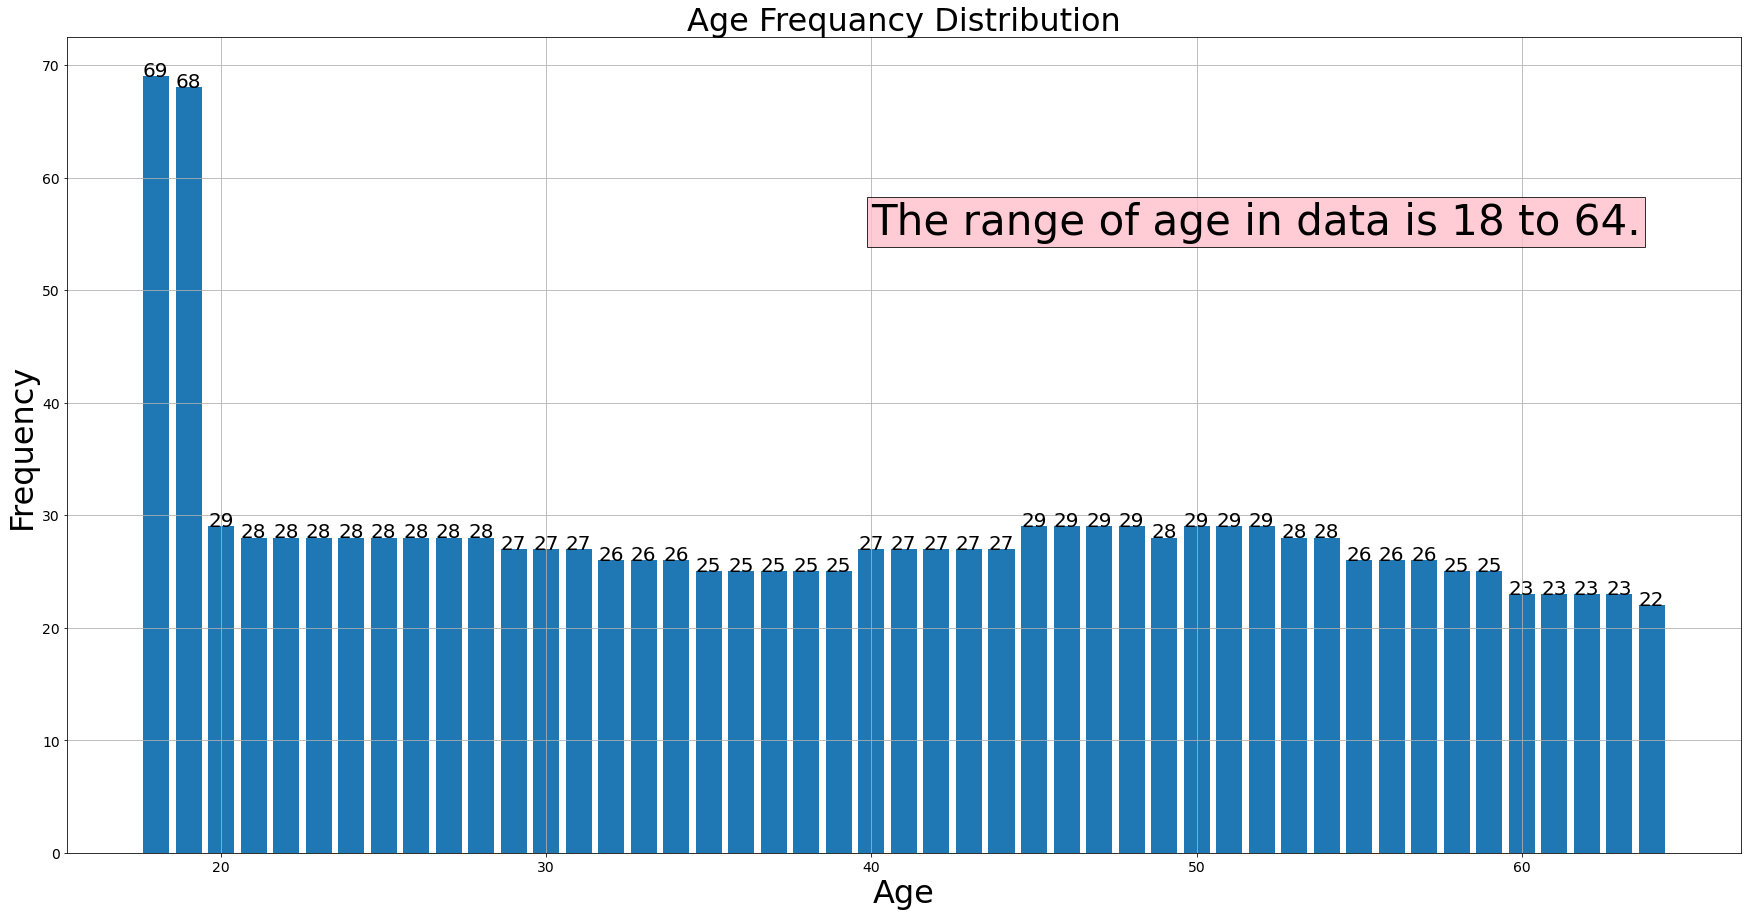

In [18]:
plt.bar(x=age['age'],height=age['count'])
plt.xlabel("Age",fontsize=32),
plt.ylabel("Frequency",fontsize=32),
plt.title('Age Frequancy Distribution',fontsize=32)
addlabels(age['age'],age['count'])
plt.grid()
plt.text(40,55, 'The range of age in data is 18 to 64.',fontsize=42,bbox = dict(facecolor = 'pink', alpha = 0.8))
plt.show()

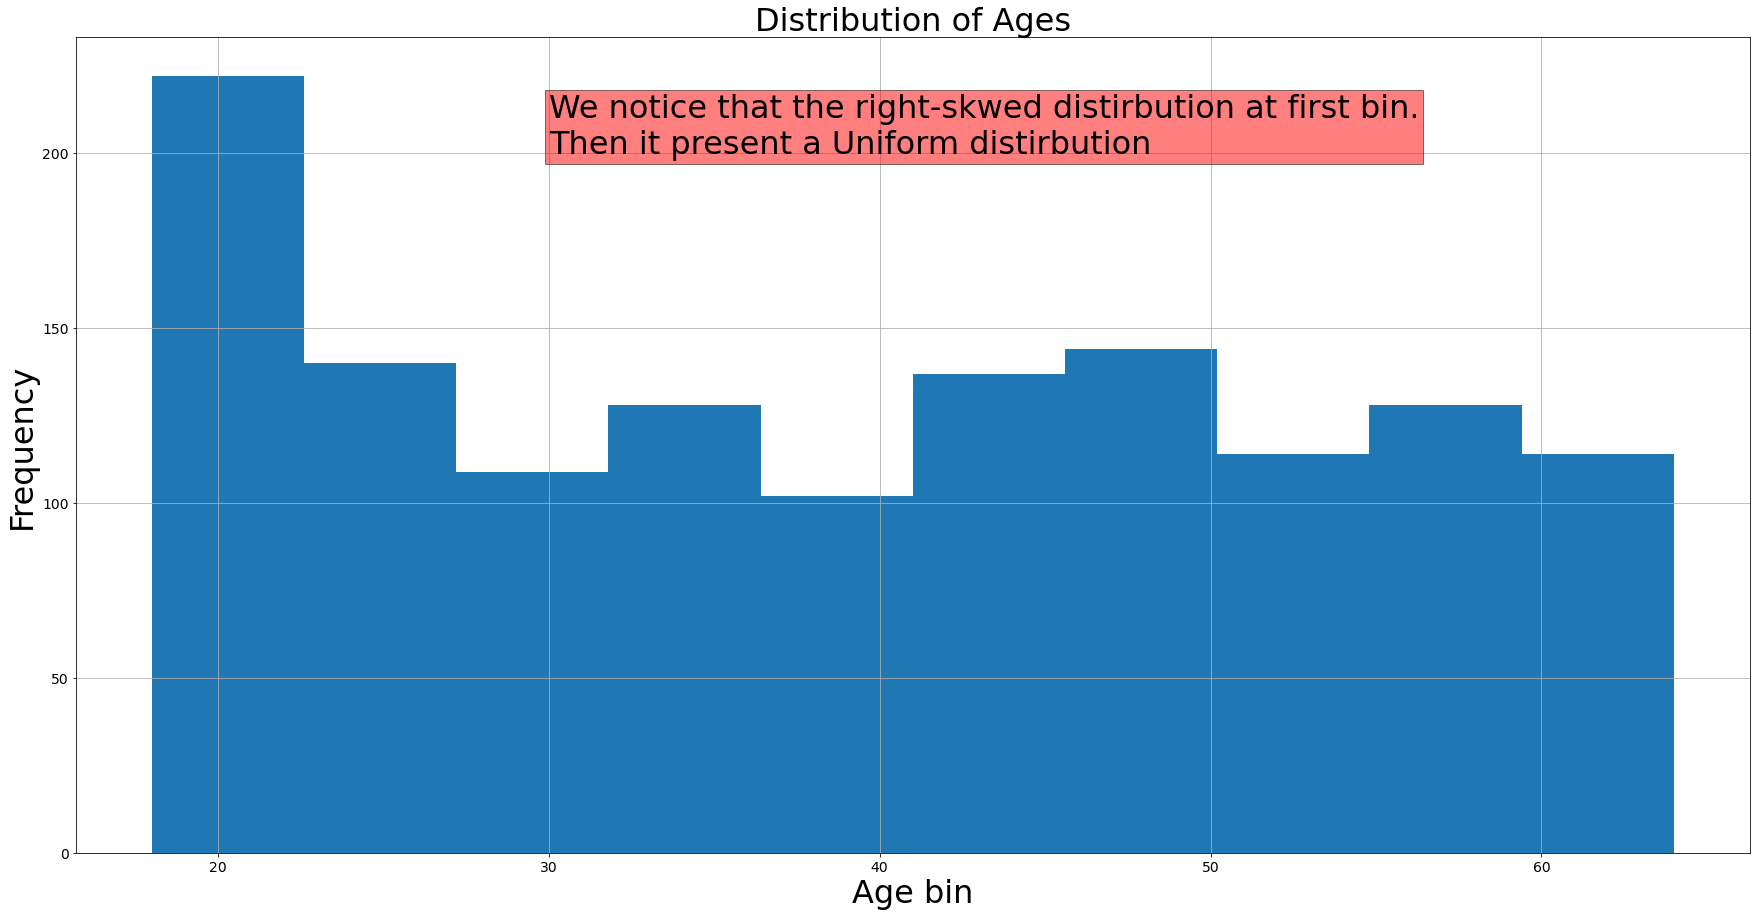

In [175]:
plt.title("Distribution of Ages",fontsize=32)
plt.xlabel("Age bin",fontsize=32)
plt.ylabel("Frequency",fontsize=32)
df['age'].hist()
plt.text(30,200,'We notice that the right-skwed distirbution at first bin.\nThen it present a Uniform distirbution',fontsize=32,bbox = dict(facecolor = 'red', alpha = 0.5))
plt.show()

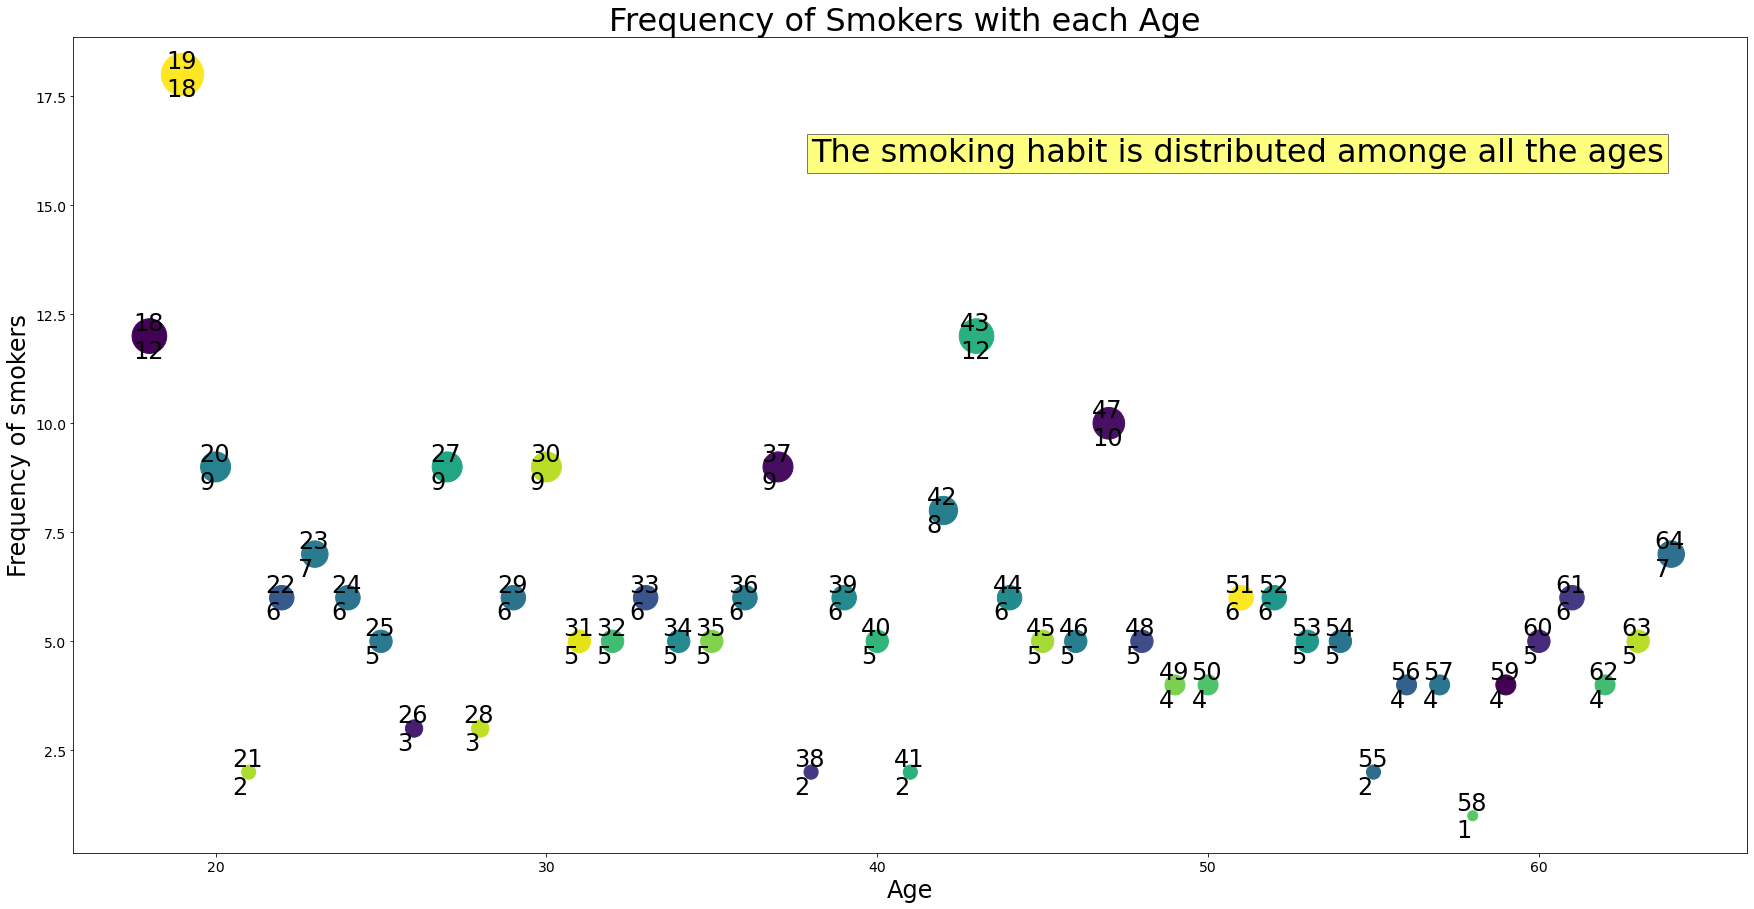

In [176]:
age_smoker_count = df.loc[df['smoker']=='yes'].groupby('age')[['smoker']].count()
colors = np.random.rand(len(age_smoker_count))
plt.scatter(x=age_smoker_count.index,y=age_smoker_count.smoker,s=age_smoker_count.smoker*100,c=colors)
plt.text(38,16,'The smoking habit is distributed amonge all the ages',fontsize=32,bbox = dict(facecolor = 'yellow', alpha = 0.5))
plt.title('Frequency of Smokers with each Age ',fontsize=32)
plt.ylabel('Frequency of smokers',fontsize=24)
plt.xlabel('Age',fontsize=24)

for x,y in zip(age_smoker_count.index,age_smoker_count.smoker):
    label = f"{x}\n{y}"
    plt.annotate(label,(x-0.5,y-0.5),fontsize=24)

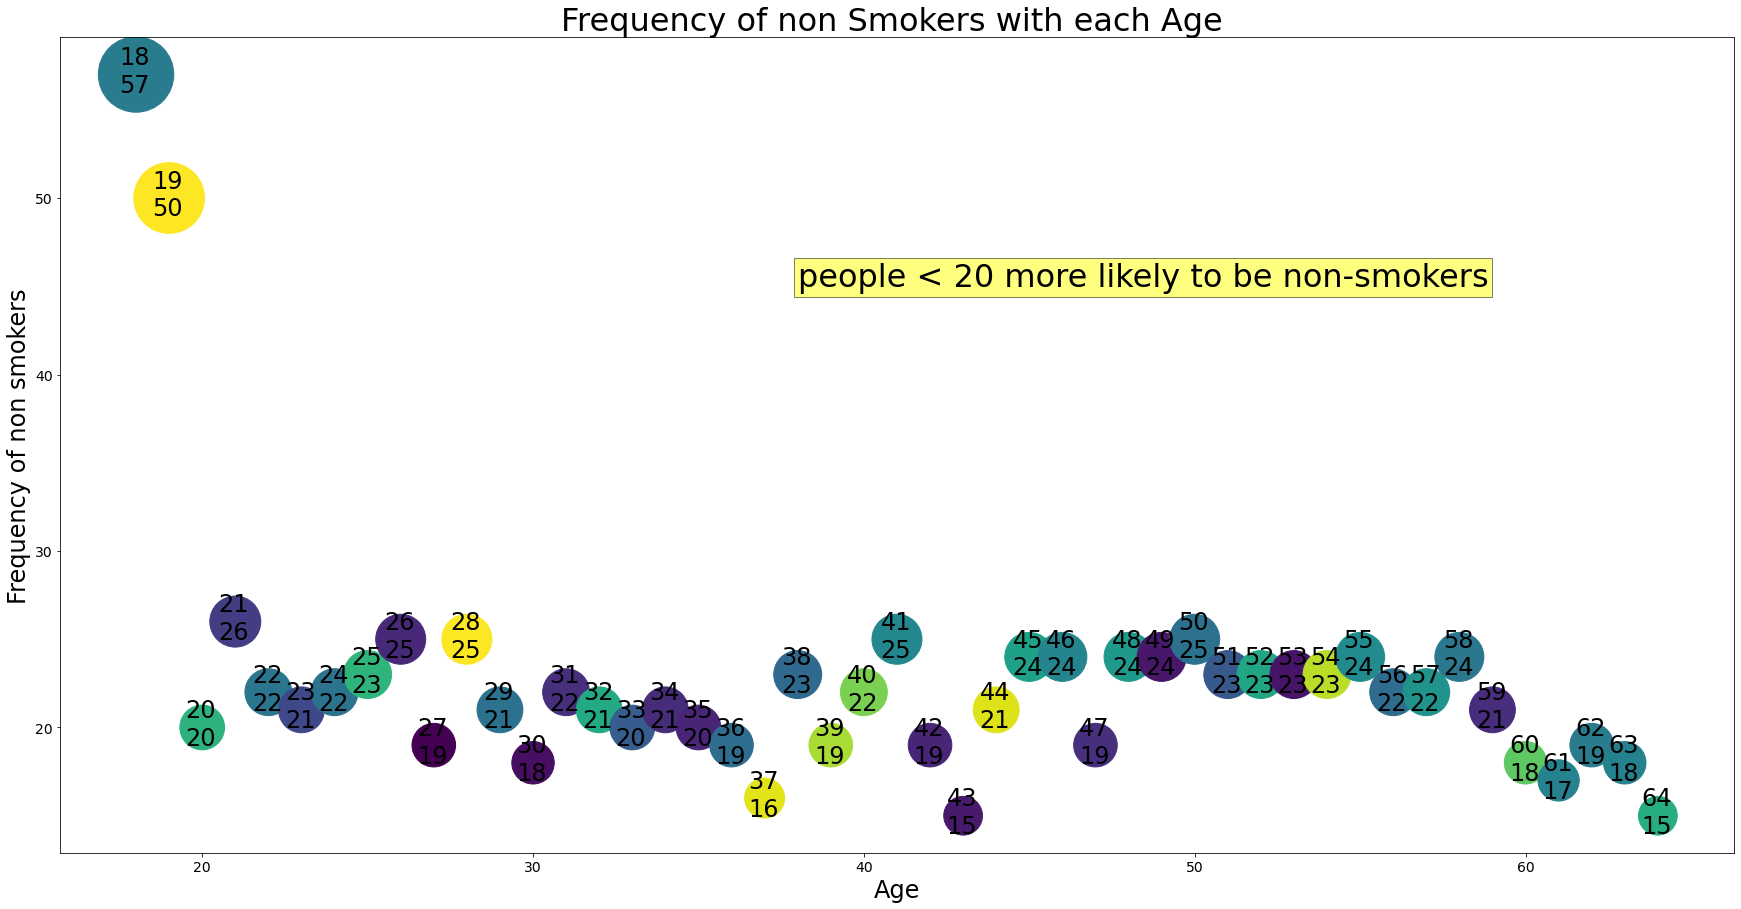

In [177]:
age_no_smoker_count = df.loc[df['smoker']=='no'].groupby('age')[['smoker']].count()
colors = np.random.rand(len(age_no_smoker_count))
plt.scatter(x=age_no_smoker_count.index,y=age_no_smoker_count.smoker,s=age_no_smoker_count.smoker*100,c=colors)
plt.text(38,45,'people < 20 more likely to be non-smokers',fontsize=32,bbox = dict(facecolor = 'yellow', alpha = 0.5))
plt.title('Frequency of non Smokers with each Age ',fontsize=32)
plt.ylabel('Frequency of non smokers',fontsize=24)
plt.xlabel('Age',fontsize=24)
for x,y in zip(age_no_smoker_count.index,age_no_smoker_count.smoker):
    label = f"{x}\n{y}"
    plt.annotate(label,(x-0.5,y-1),fontsize=24)

# Children

In [22]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

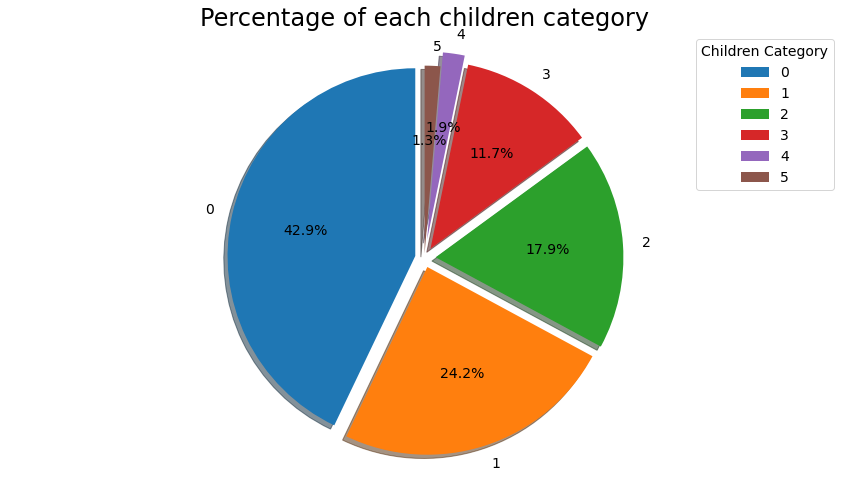

In [23]:
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['children'].value_counts(), explode = (0.05,0.05,0.06,0.06,0.1,0.025) ,labels=['0','1','2','3','4','5'], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Percentage of each children category',fontsize=24)
plt.tight_layout()
plt.legend (title="Children Category")
plt.show()

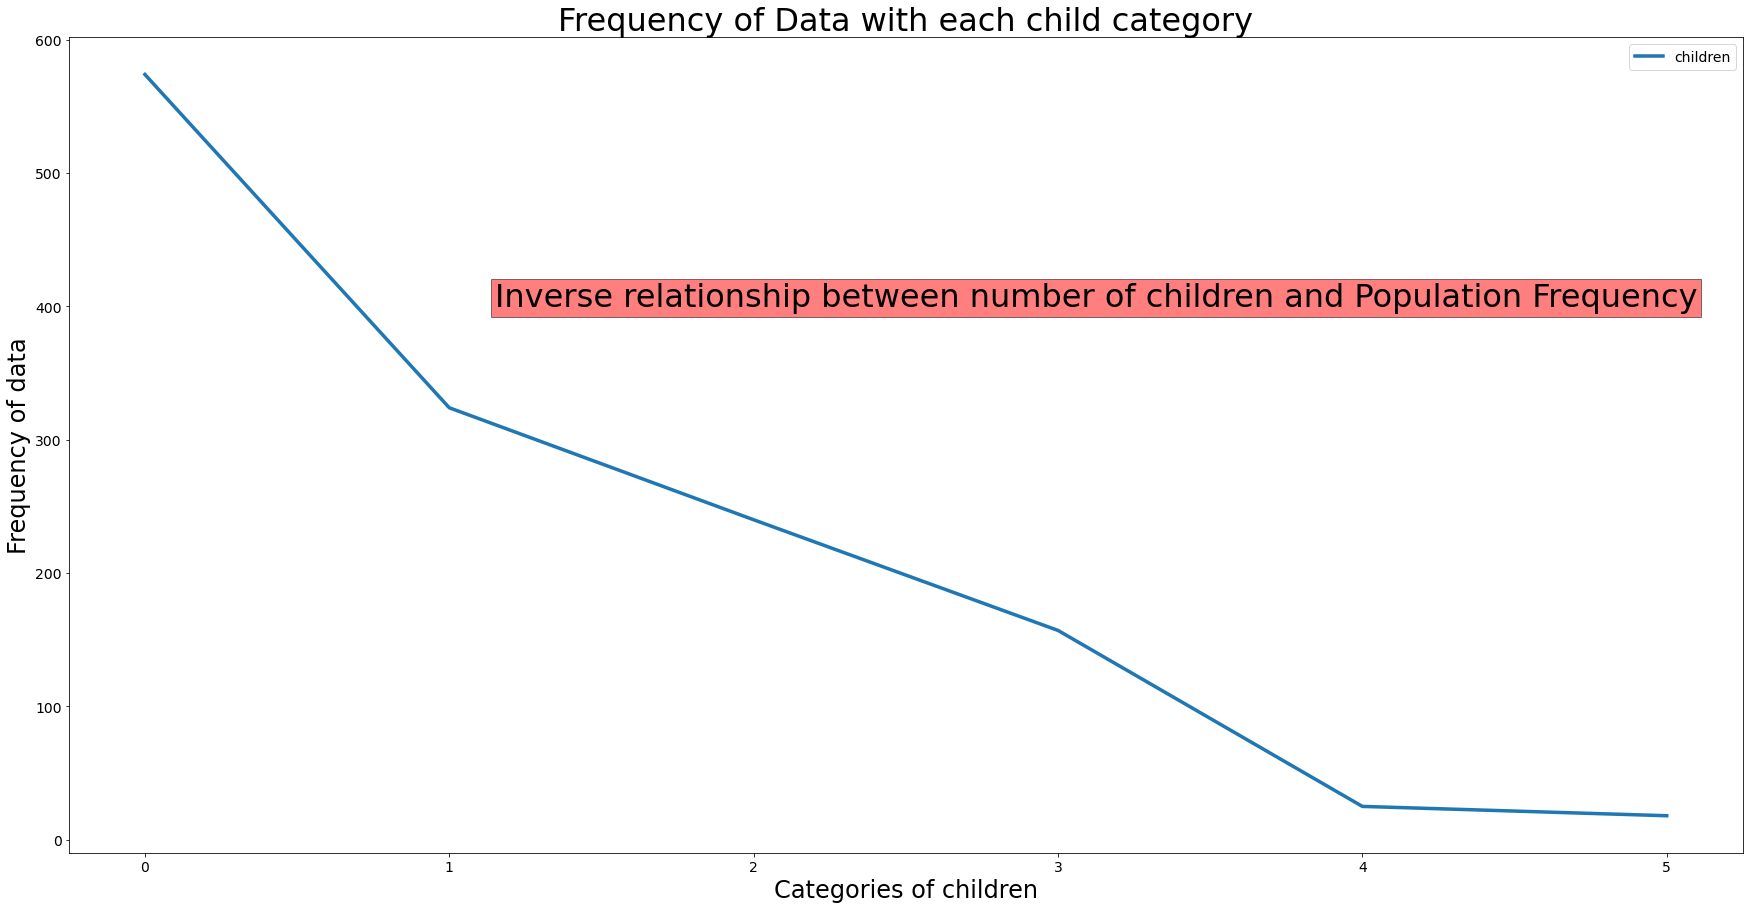

In [24]:
df['children'].value_counts().plot(linewidth=3.5)
plt.title('Frequency of Data with each child category',fontsize=32)
plt.text(1.15, 400, 'Inverse relationship between number of children and Population Frequency', fontsize=32,bbox = dict(facecolor = 'red', alpha = 0.5))
plt.ylabel('Frequency of data',fontsize=24)
plt.xlabel('Categories of children',fontsize=24)
plt.legend()
plt.show()

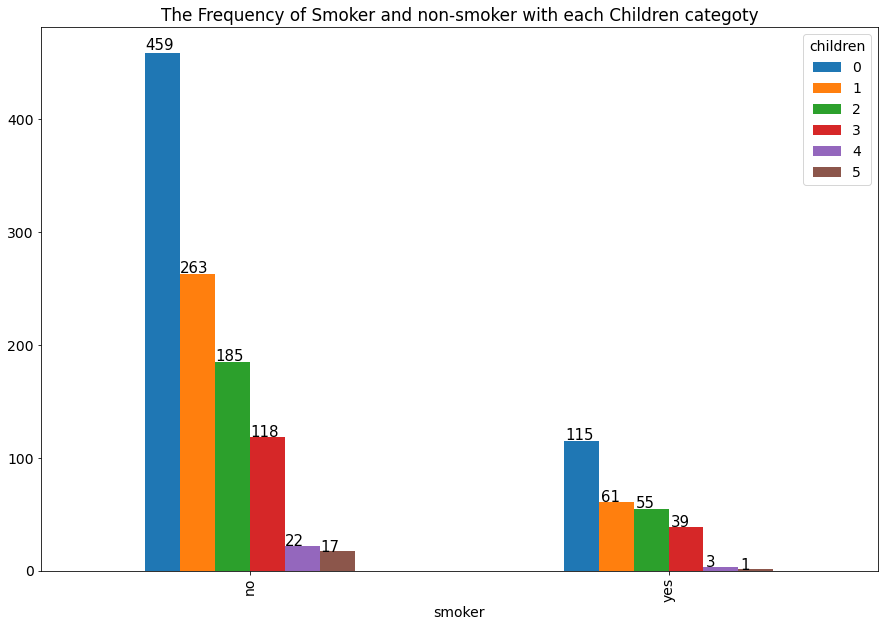

In [26]:
CrosstabResult=pd.crosstab(index=df['smoker'],columns=df['children'])
ax = CrosstabResult.plot.bar(figsize=(15,10),title='The Frequency of Smoker and non-smoker with each Children categoty')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=15)

In [25]:
df.loc[df['children'] > 0].groupby(['sex'])[["children"]].count()

,children
sex,
female,373
male,391


## Insights
### 1. The number of children in the data samples are between 0 and 5.
### 2. Most of population has no children, in second come the people who have 1 child.
### 3. Males have children more then females.
### 4. people with children attend to be non-smokers. 

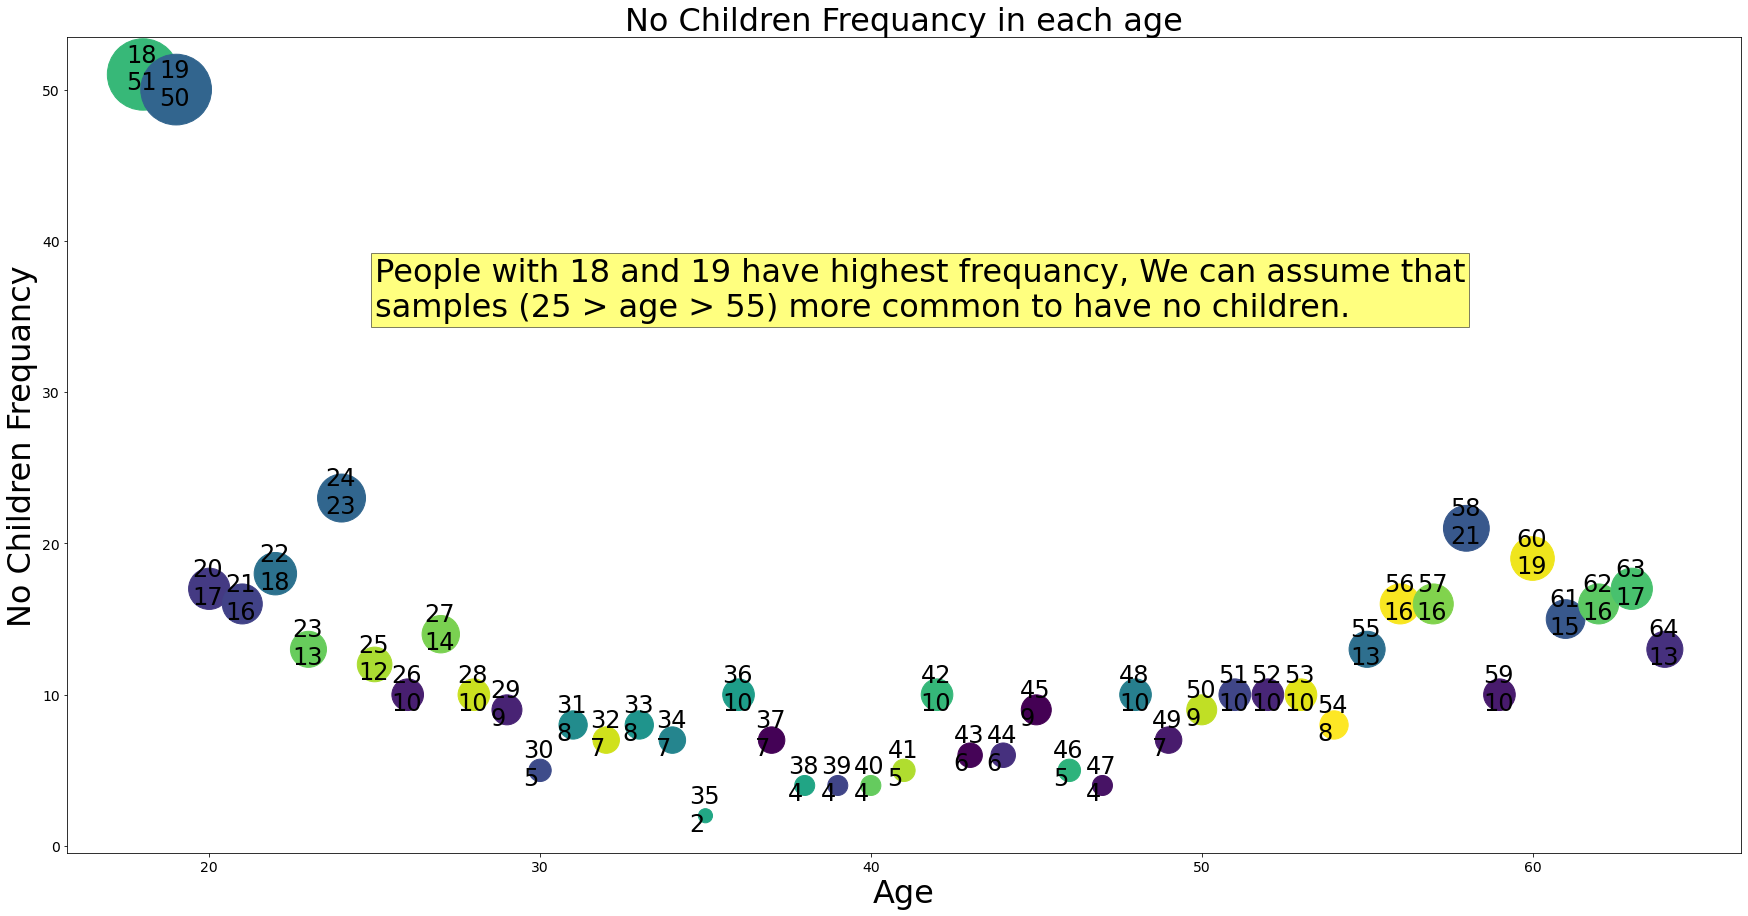

In [27]:
age_no_children_count = df.loc[df['children']==0].groupby(['age'])[['age']].count()
colors = np.random.rand(len(age_no_children_count))
plt.scatter(x=age_no_children_count.index,y=age_no_children_count.age,s=age_no_children_count.age*100,c=colors)
plt.text(25, 35,"People with 18 and 19 have highest frequancy, We can assume that\nsamples (25 > age > 55) more common to have no children.  ", fontsize=32,bbox = dict(facecolor = 'yellow', alpha = 0.5))
plt.title('No Children Frequancy in each age',fontsize=32)
plt.xlabel('Age',fontsize=32)
plt.ylabel('No Children Frequancy',fontsize=32)
for x,y in zip(age_no_children_count.index,age_no_children_count.age):
    label = f"{x}\n{y}"
    plt.annotate(label,(x-0.5,y-1),fontsize=24)

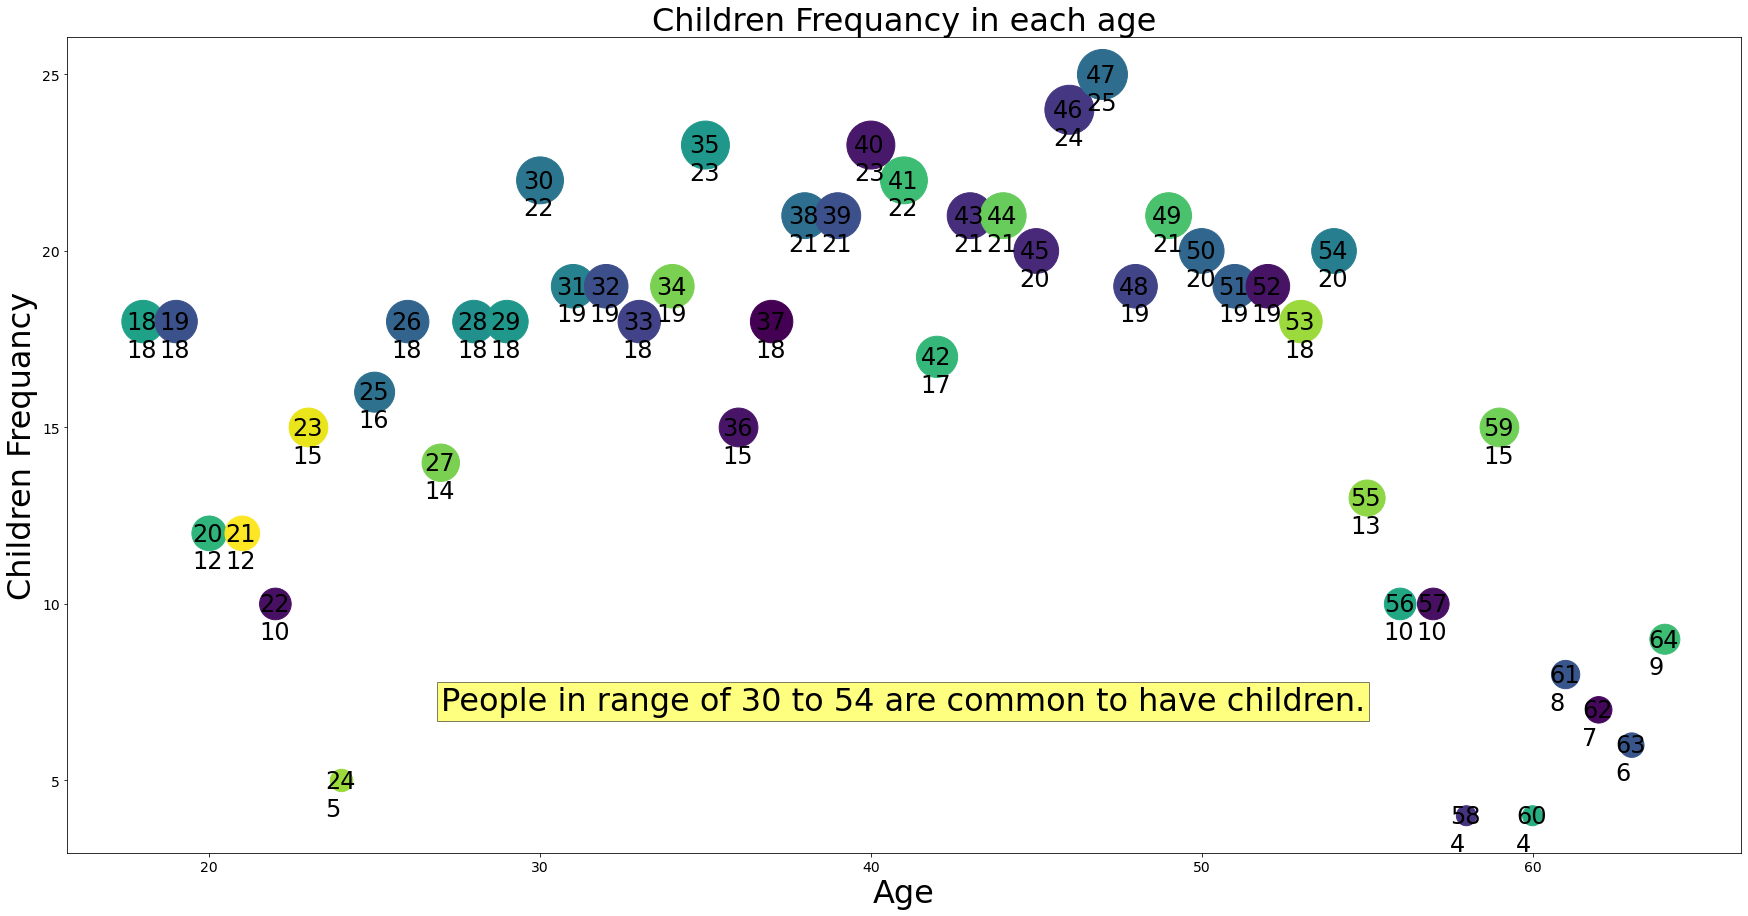

In [28]:
age_children_count = df.loc[df['children']>0].groupby(['age'])[['age']].count()
colors = np.random.rand(len(age_children_count))
plt.scatter(x=age_children_count.index,y=age_children_count.age,s=age_children_count.age*100,c=colors)
plt.text(27,7,"People in range of 30 to 54 are common to have children.", fontsize=32,bbox = dict(facecolor = 'yellow', alpha = 0.5))
plt.title('Children Frequancy in each age',fontsize=32)
plt.xlabel('Age',fontsize=32)
plt.ylabel('Children Frequancy',fontsize=32)
for x,y in zip(age_children_count.index,age_children_count.age):
    label = f"{x}\n{y}"
    plt.annotate(label,(x-0.5,y-1),fontsize=24)

# Charges

In [29]:
df[['charges']].describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


## Avarage of charges is 13000.

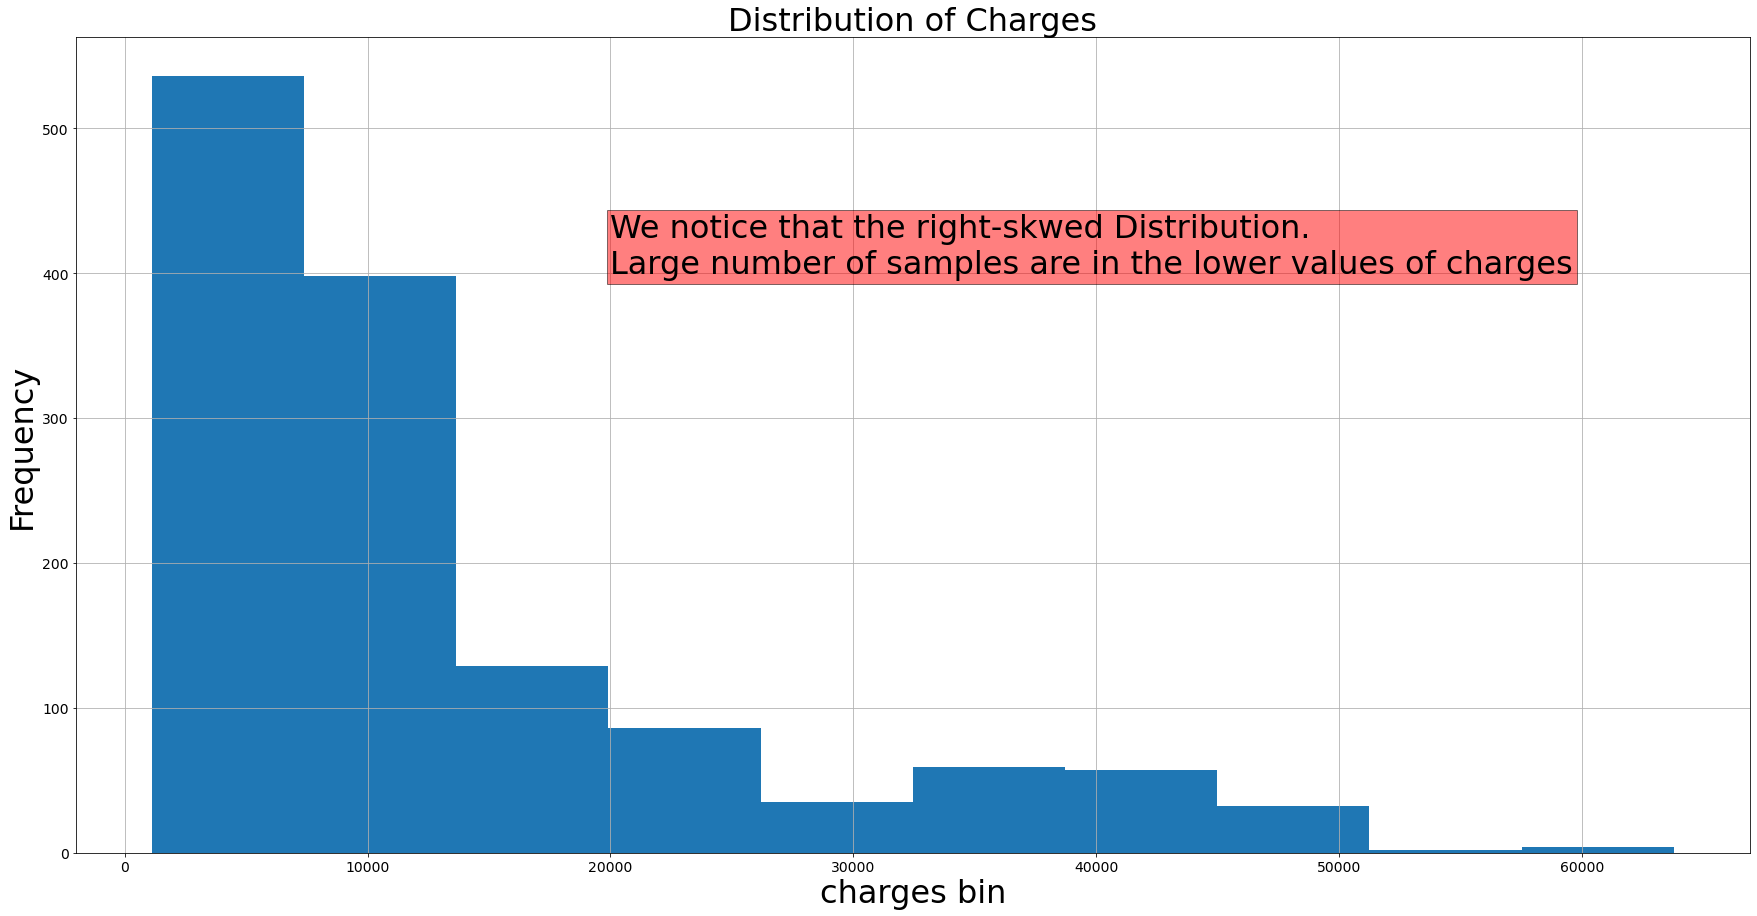

In [30]:
plt.title("Distribution of Charges",fontsize=32)
plt.xlabel("charges bin",fontsize=32)
plt.ylabel("Frequency",fontsize=32)
df['charges'].hist()
plt.text(20000,400,'We notice that the right-skwed Distribution.\nLarge number of samples are in the lower values of charges',fontsize=32,bbox = dict(facecolor = 'red', alpha = 0.5))
plt.show()

### Determining the outliers based on charges using percentials

In [31]:
upper_lim = df['charges'].quantile(.95)
lower_lim = df['charges'].quantile(.05)
print(upper_lim,lower_lim)
df[(df['charges'] > upper_lim) | (df['charges'] < lower_lim)]

41181.82778749992 1757.7534


,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
22,18,male,34.100,0,no,southeast,1137.01100
34,28,male,36.400,1,yes,southwest,51194.55914
35,19,male,20.425,0,no,northwest,1625.43375
39,60,male,39.900,0,yes,southwest,48173.36100
...,...,...,...,...,...,...,...
1301,62,male,30.875,3,yes,northwest,46718.16325
1316,19,female,20.600,0,no,southwest,1731.67700
1317,18,male,53.130,0,no,southeast,1163.46270
1323,42,female,40.370,2,yes,southeast,43896.37630


In [32]:
len(df[(df['charges'] > upper_lim) | (df['charges'] < lower_lim)])/len(df)*100

10.014947683109119

### The uncommon charge values are the ones more then 41,000 or less then 1750.
### The outlires present 10% from  total of the dataset.

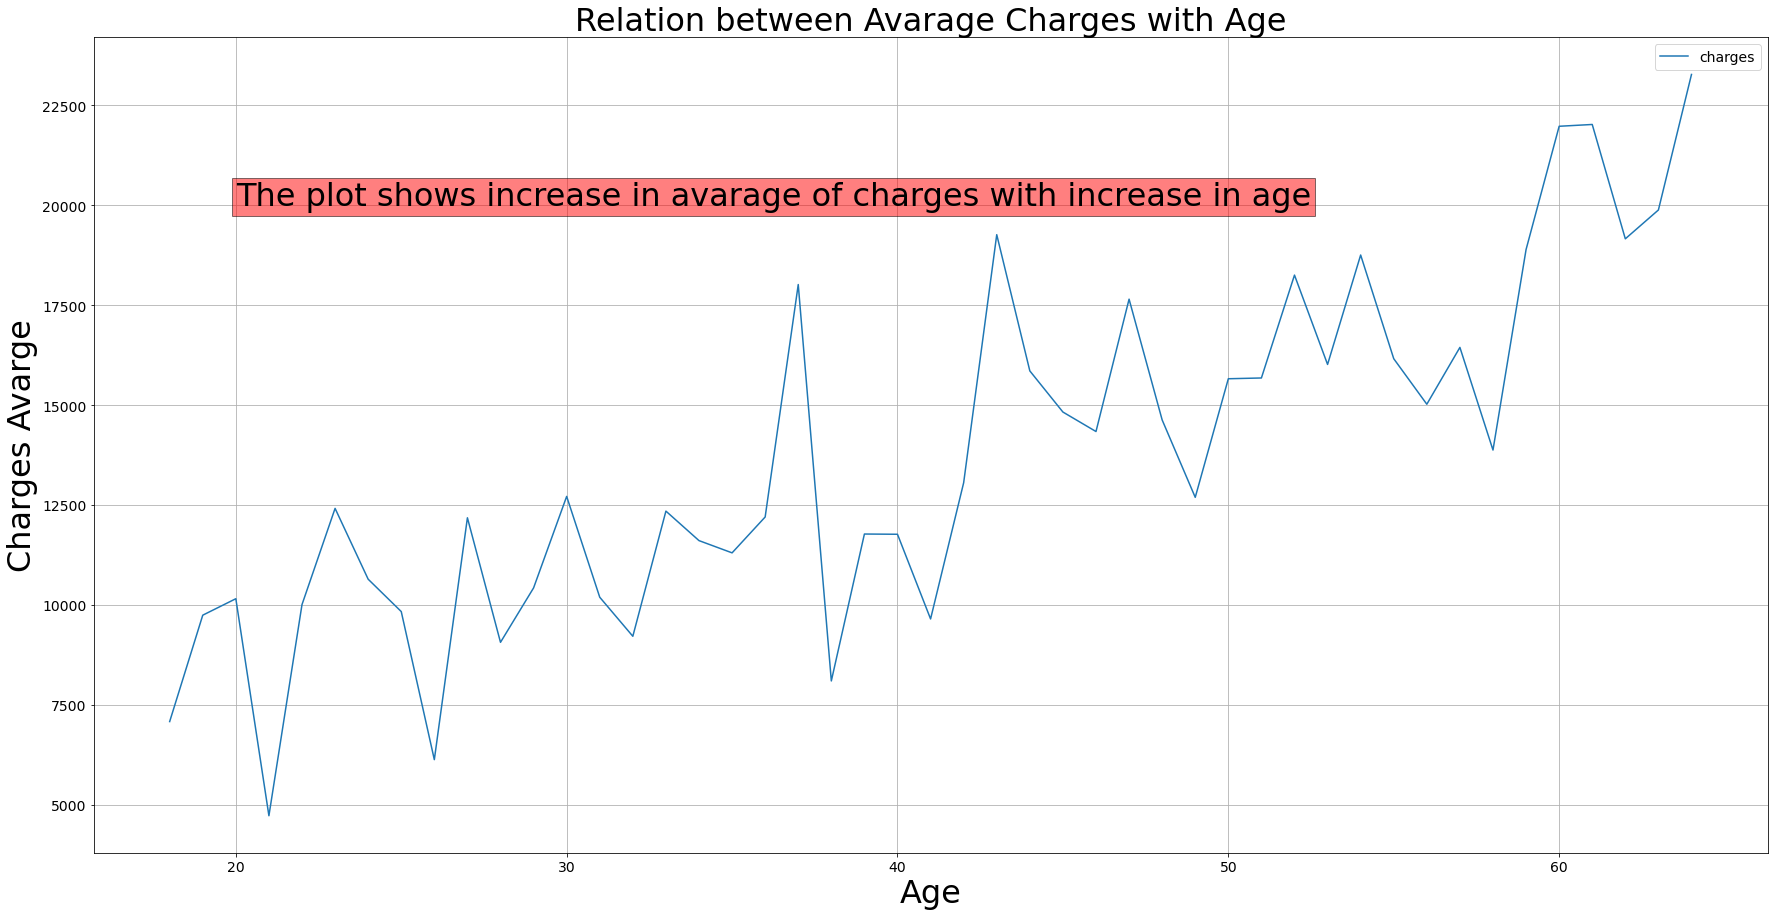

In [33]:
df.groupby(['age'])[['charges']].mean().reset_index().sort_values('age',ascending=True).plot(x='age',y='charges',grid=True)
plt.title('Relation between Avarage Charges with Age',fontsize=32)
plt.ylabel('Charges Avarge',fontsize=32)
plt.xlabel('Age',fontsize=32)
plt.text(20,20000,'The plot shows increase in avarage of charges with increase in age',fontsize=32,bbox = dict(facecolor = 'red', alpha = 0.5))
plt.show()

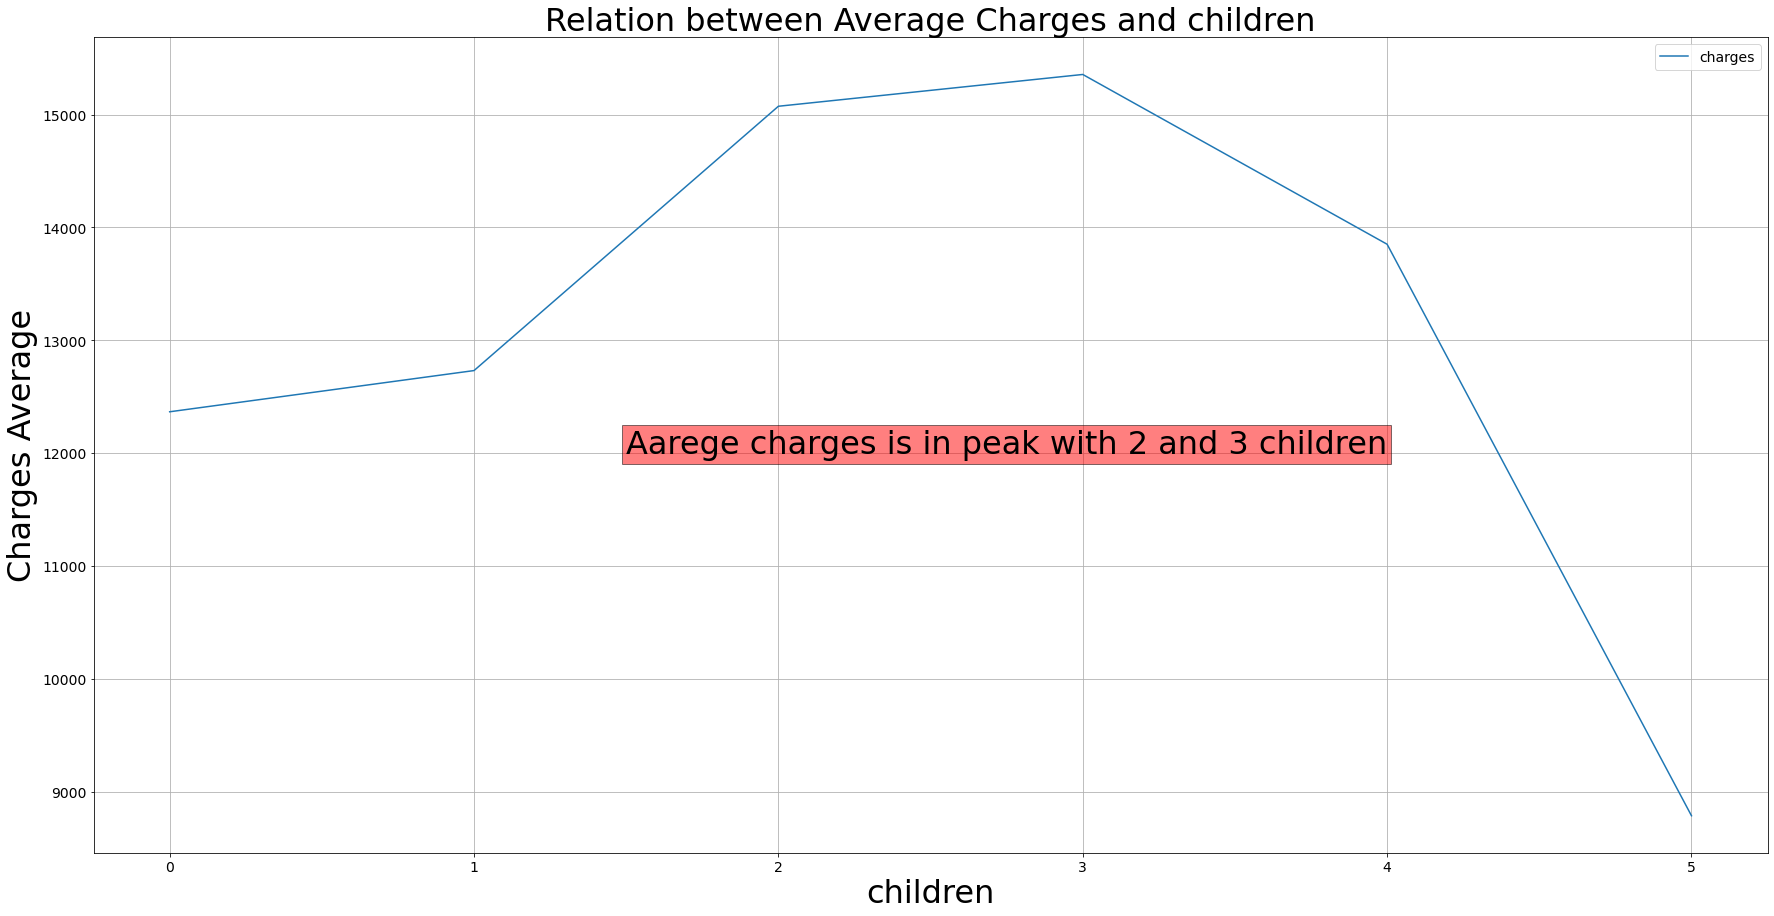

In [186]:
df.groupby(['children'])[['charges']].mean().reset_index().sort_values('children',ascending=True).plot(x='children',y='charges',grid=True)
plt.title('Relation between Average Charges and children',fontsize=32)
plt.ylabel('Charges Average',fontsize=32)
plt.xlabel('children',fontsize=32)
plt.text(1.5,12000,'Aarege charges is in peak with 2 and 3 children',fontsize=32,bbox = dict(facecolor = 'red', alpha = 0.5))
plt.show()

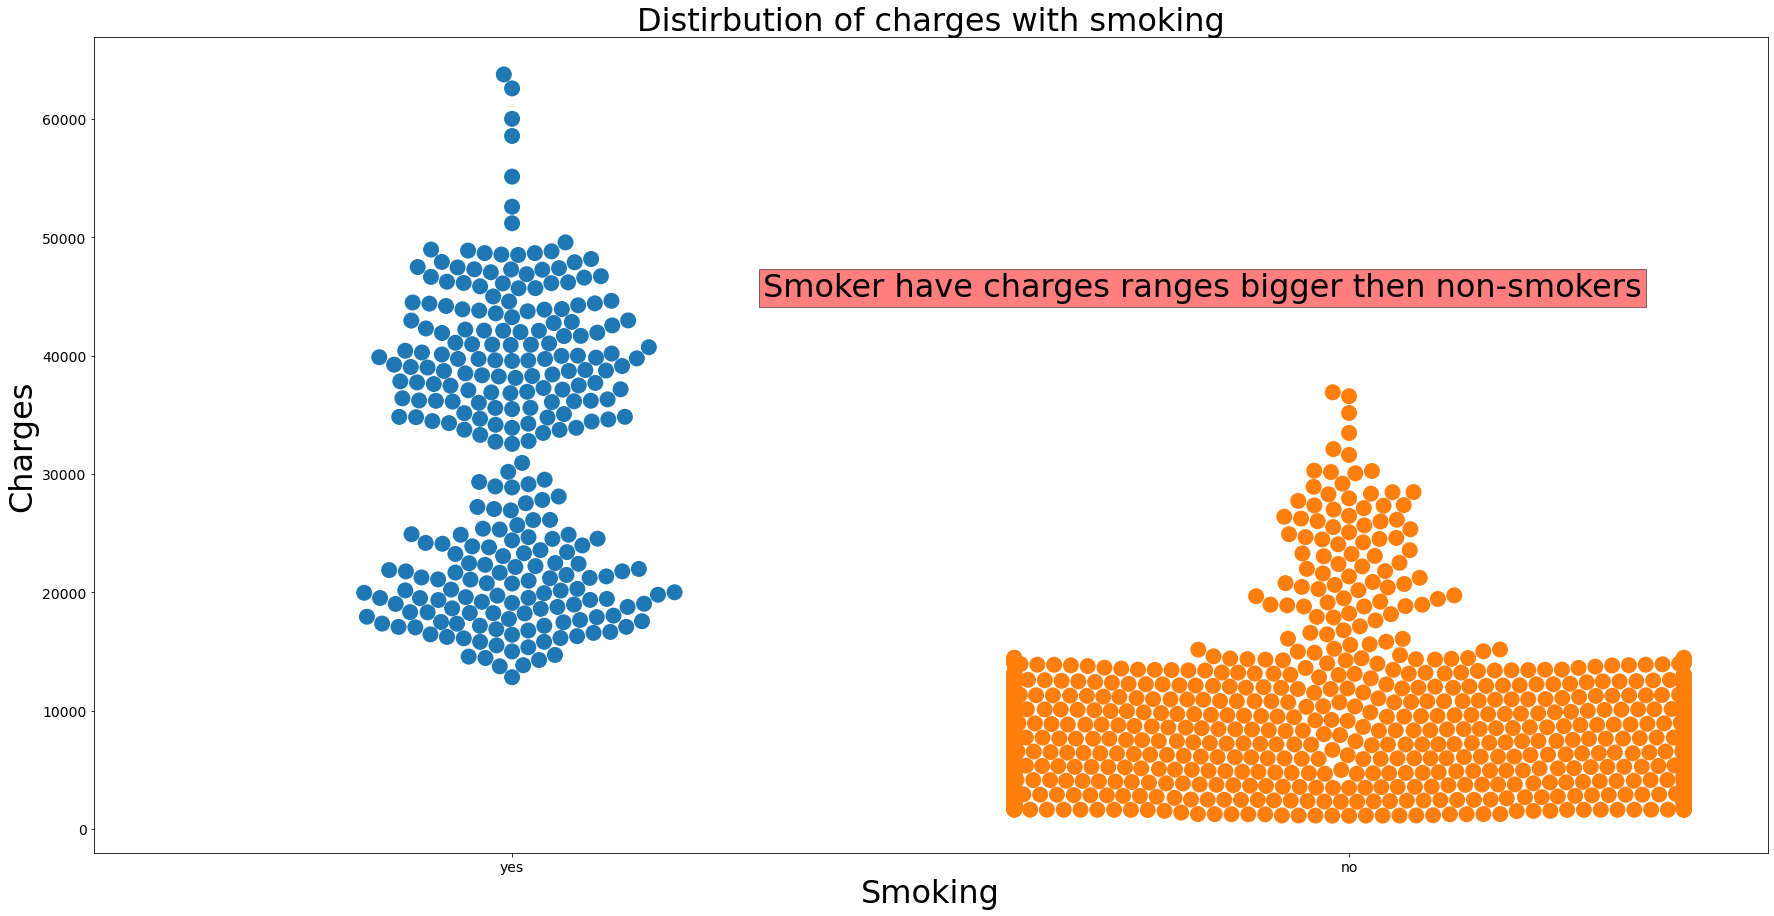

In [34]:
sns.swarmplot(x="smoker", y="charges", data=df, size=16)
plt.title('Distirbution of charges with smoking',fontsize=32)
plt.ylabel('Charges',fontsize=32)
plt.xlabel('Smoking',fontsize=32)
plt.text(0.3,45000,'Smoker have charges ranges bigger then non-smokers',fontsize=32,bbox = dict(facecolor = 'red', alpha = 0.5))
plt.show()

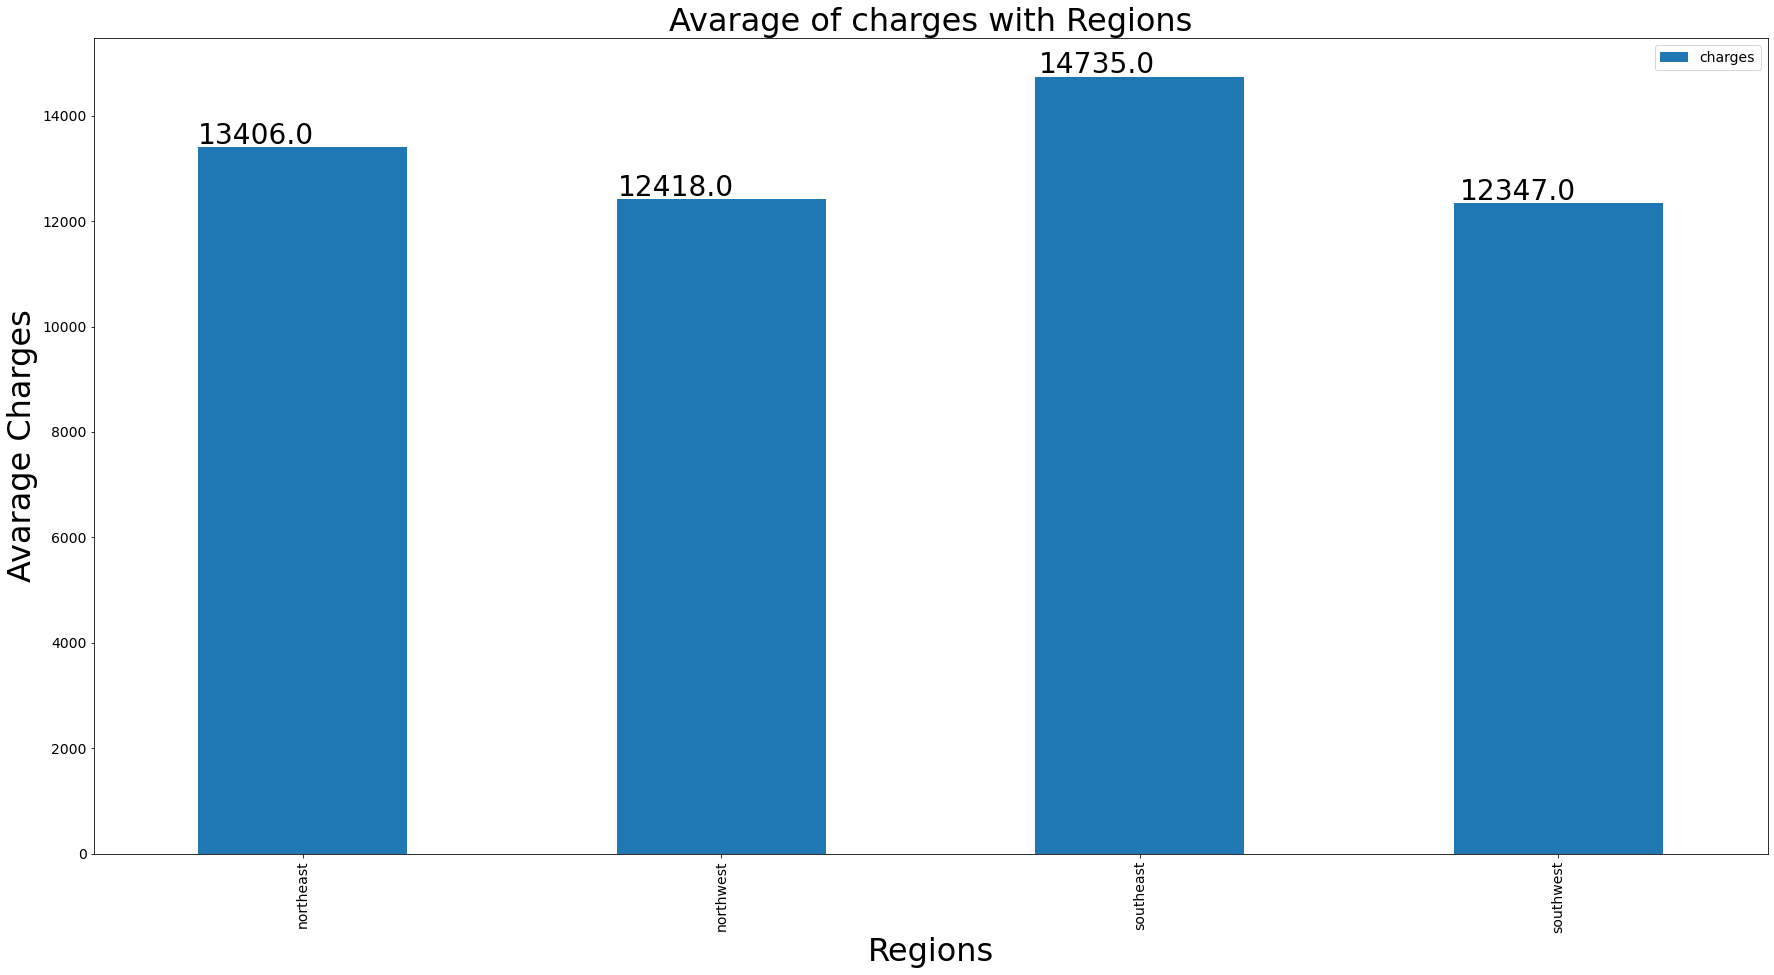

In [35]:
ax = df.groupby(['region'])[['charges']].mean().round(decimals=0).plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=28)
plt.title('Avarage of charges with Regions',fontsize=32)
plt.ylabel('Avarage Charges',fontsize=32)
plt.xlabel('Regions',fontsize=32)
plt.show()

### 1. Southeast has the hightest avarge chargers.
### 2. In second come the northeast.
### 3. In general the Avarge Charges in all region are close.

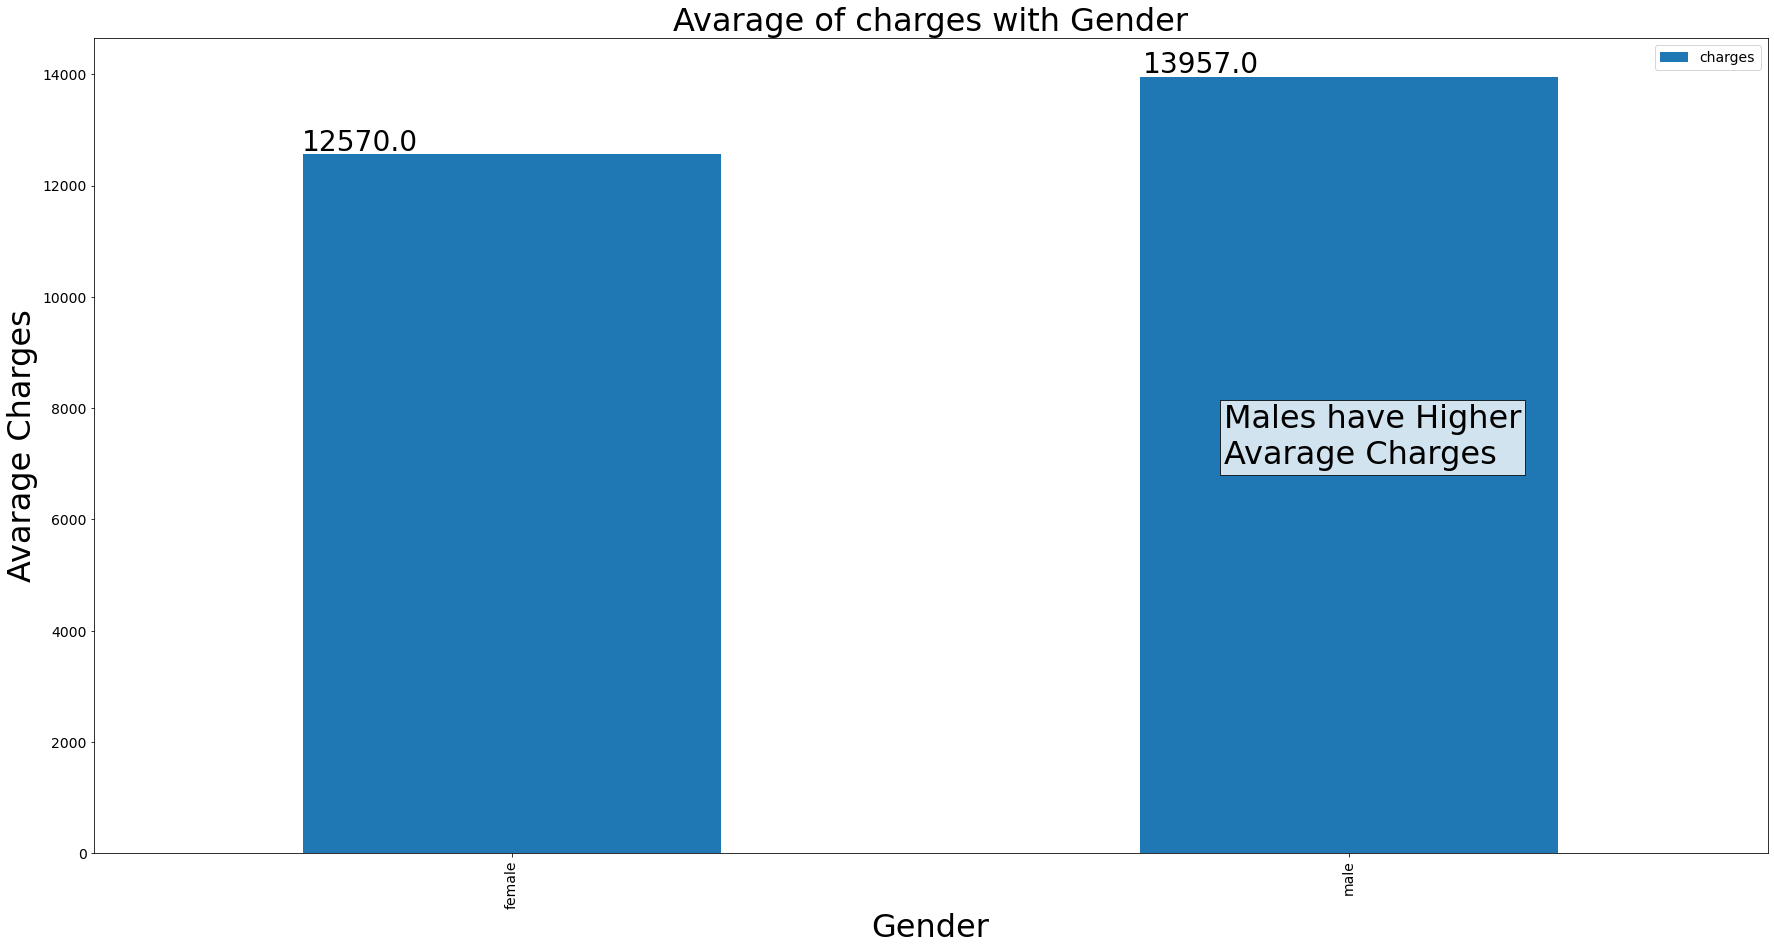

In [36]:
ax = df.groupby(['sex'])[['charges']].mean().round(decimals=0).plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=28)
plt.title('Avarage of charges with Gender',fontsize=32)
plt.ylabel('Avarage Charges',fontsize=32)
plt.xlabel('Gender',fontsize=32)
plt.text(0.85,7000,'Males have Higher\nAvarage Charges',fontsize=32,bbox = dict(facecolor = 'white', alpha = 0.8))
plt.show()

# BMI (body mass index)

In [37]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [38]:
shapiro(df['bmi'])

ShapiroResult(statistic=0.9938876032829285, pvalue=2.609841976664029e-05)

Text(38, 250, 'dose not present a normal distribution')

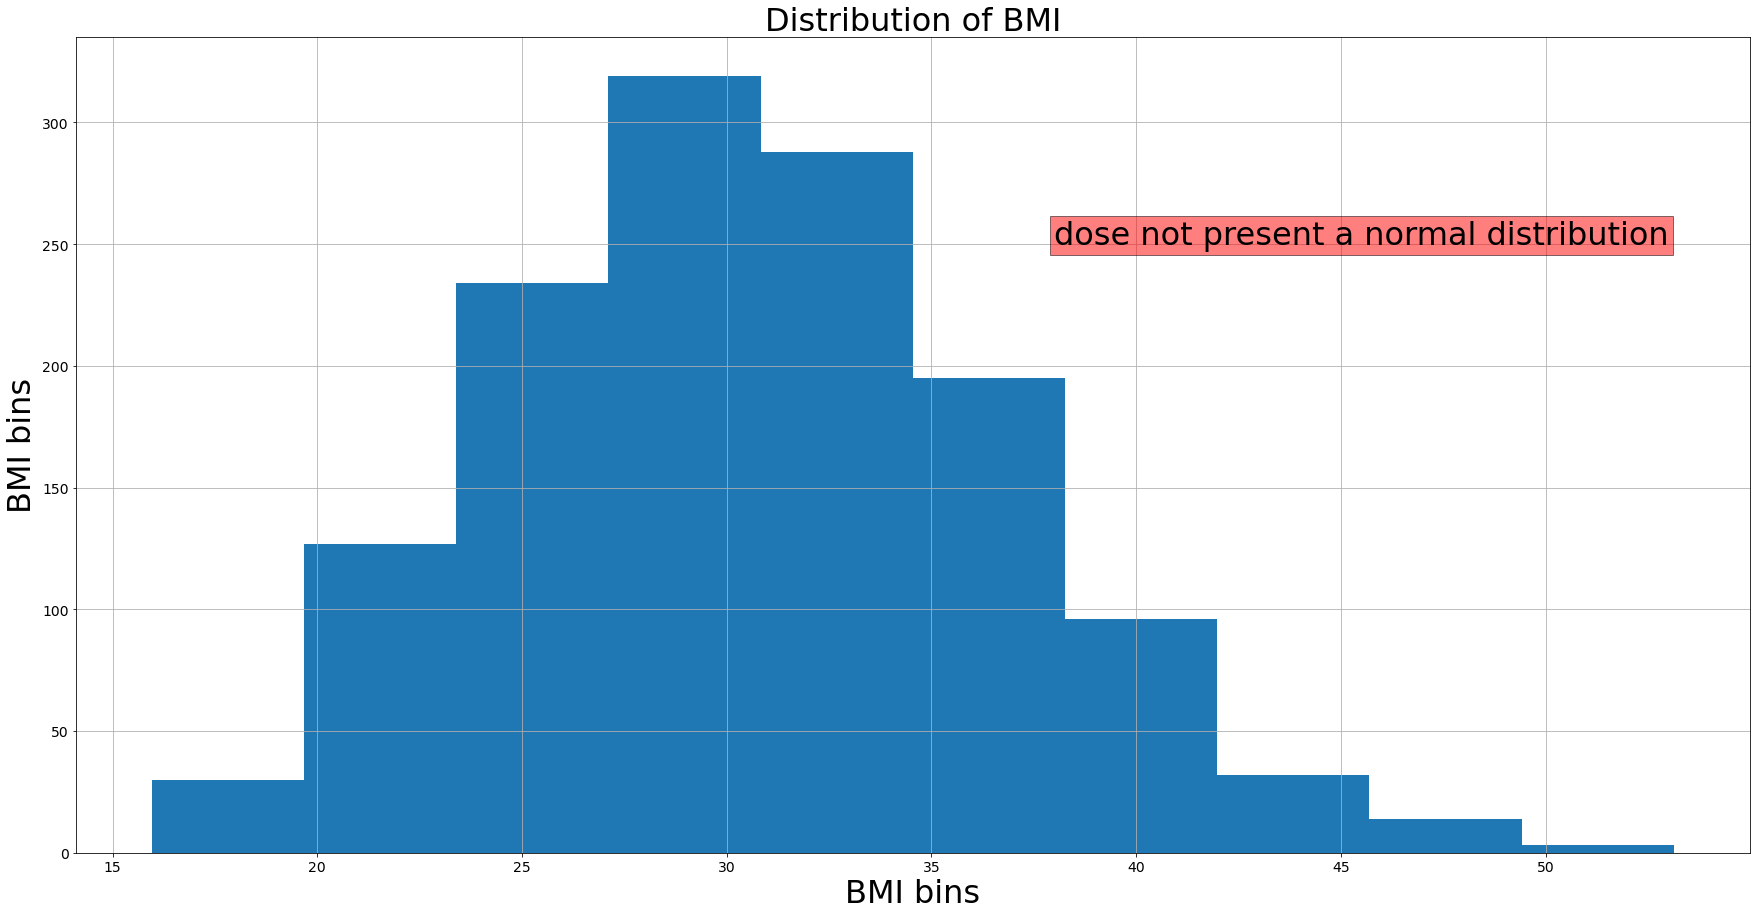

In [39]:
df['bmi'].hist(grid=True)
plt.title('Distribution of BMI',fontsize=32)
plt.xlabel('BMI bins',fontsize=32)
plt.ylabel('BMI bins',fontsize=32)
plt.text(38,250,'dose not present a normal distribution',fontsize=32,bbox = dict(facecolor = 'red', alpha = 0.5))

## The column of BMI is not easy to get information from, for that feature construction will apply to have more undersatndable data.

### Feature Construction

bmi:
underweight = <18.5
Normal weight = 18.5–24.9 
Overweight = 25–29.9 
Obesity = BMI of 30 or greater

In [40]:
df['bmi classify'] = 'Normal weight'
df['bmi classify'].loc[df['bmi']<18.5] = 'Underweight'
df['bmi classify'].loc[(df['bmi']>=25) & (df['bmi']<=29.9)] = 'Overweight'
df['bmi classify'].loc[(df['bmi']>= 30)& (df['bmi']<=39.9)] = 'Obesity'
df['bmi classify'].loc[df['bmi']>= 40] = 'Extreme Obesity'
df

/Library/anaconda3/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,age,sex,bmi,children,smoker,region,charges,bmi classify
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obesity
1334,18,female,31.920,0,no,northeast,2205.98080,Obesity
1335,18,female,36.850,0,no,southeast,1629.83350,Obesity
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


In [41]:
df.groupby(['bmi classify'])['bmi'].count().sort_values()

bmi classify
Underweight         20
Extreme Obesity     91
Normal weight      236
Overweight         377
Obesity            614
Name: bmi, dtype: int64

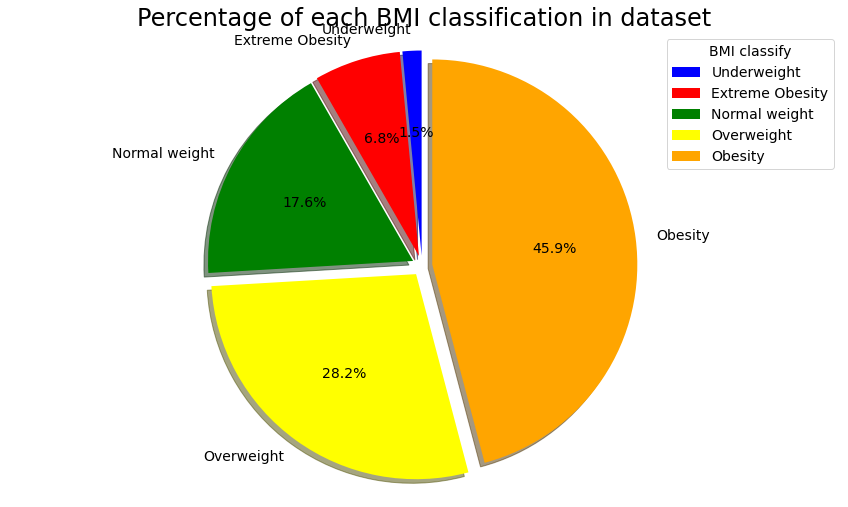

In [179]:
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df.groupby(['bmi classify'])['bmi'].count().sort_values(), explode = (0.05,0.05,0.05,0.05,0.05) ,labels=['Underweight','Extreme Obesity','Normal weight','Overweight','Obesity'], colors=['blue','red','green','yellow','orange'], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Percentage of each BMI classification in dataset',fontsize=24)
plt.legend (title="BMI classify")
plt.show()

## Insights from BMI classification:

### * almost half of data samples have obesity.
### * In second come people with overwight with percentage of 28%.
### * People with underwigth are the most smallest percentage 1.5%.
### * 6% of samples have extreme obesity.
### * The avarge BMI is 30.


### From this samples we can assume thar people living in US attend to have gaining wight problems. where the summation of percentage for people with overwight, obesity and extreme obesity is 80%.

### Data count in bmi classifications is not balanced

# Gathering more insights from relation of bmi classification with other features

Text(0, 15000, 'Linear Relationship,\nBMI increases = Avarage of charges increse')

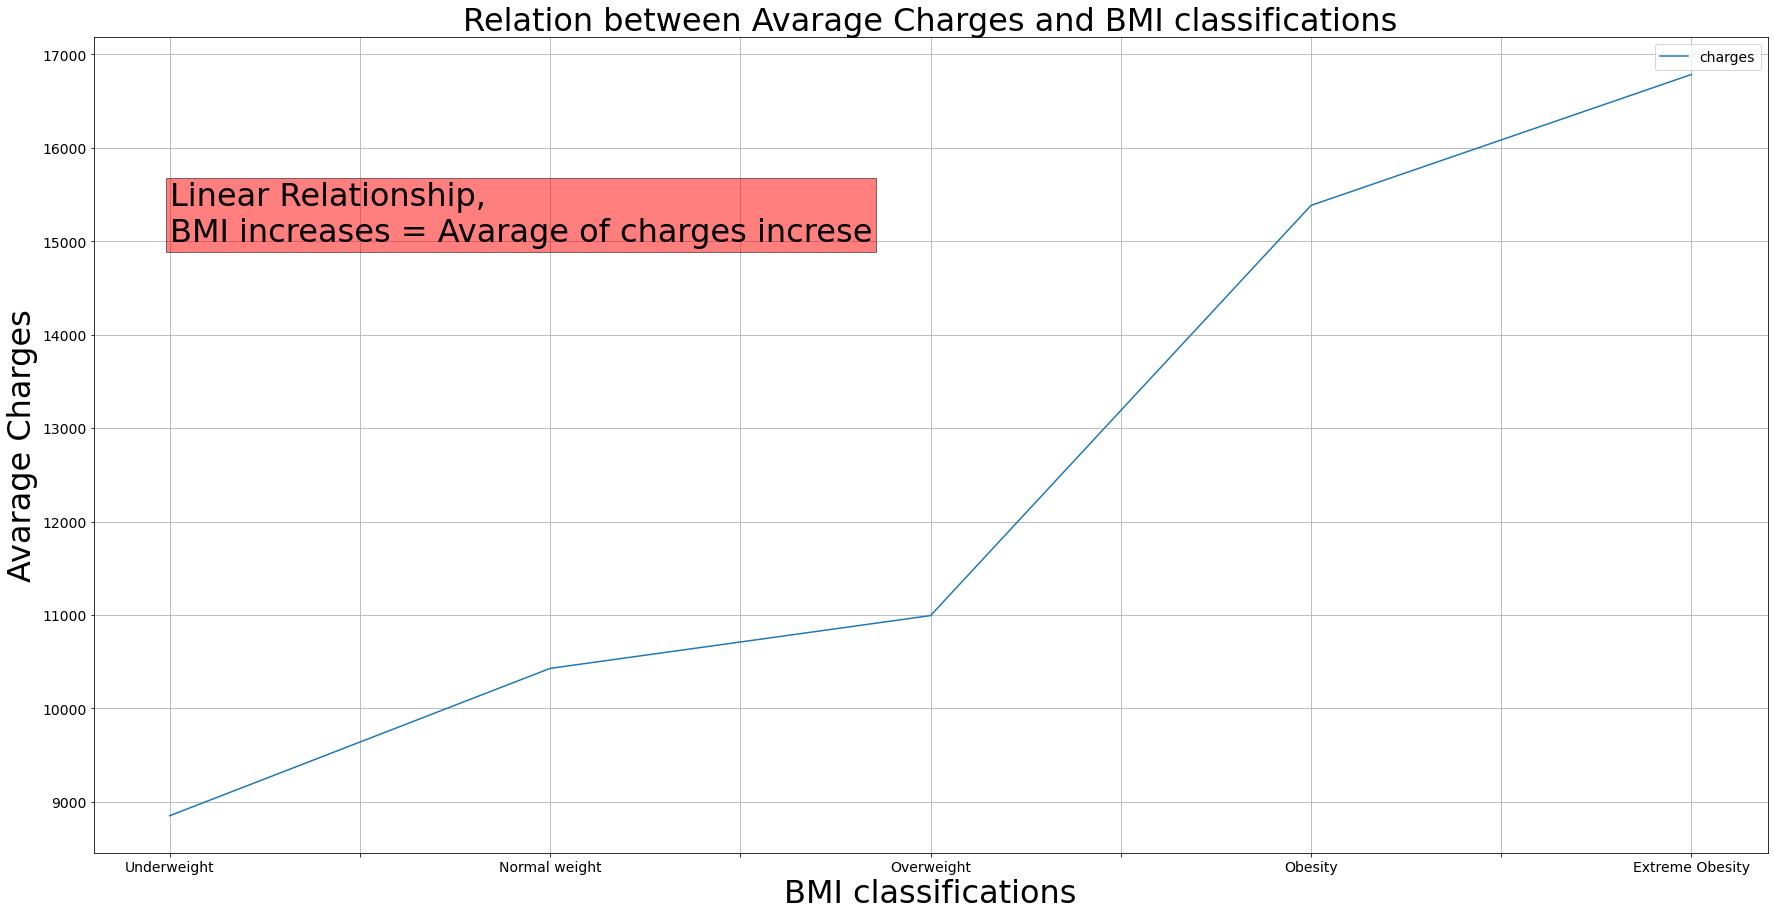

In [43]:
df.groupby(['bmi classify'])[['charges']].mean().reset_index().sort_values('charges',ascending=True).plot(x='bmi classify',y='charges',grid=True)
plt.title('Relation between Avarage Charges and BMI classifications',fontsize=32)
plt.xlabel('BMI classifications',fontsize=32)
plt.ylabel('Avarage Charges',fontsize=32)
plt.text(0,15000,'Linear Relationship,\nBMI increases = Avarage of charges increse',fontsize=32,bbox = dict(facecolor = 'red', alpha = 0.5))

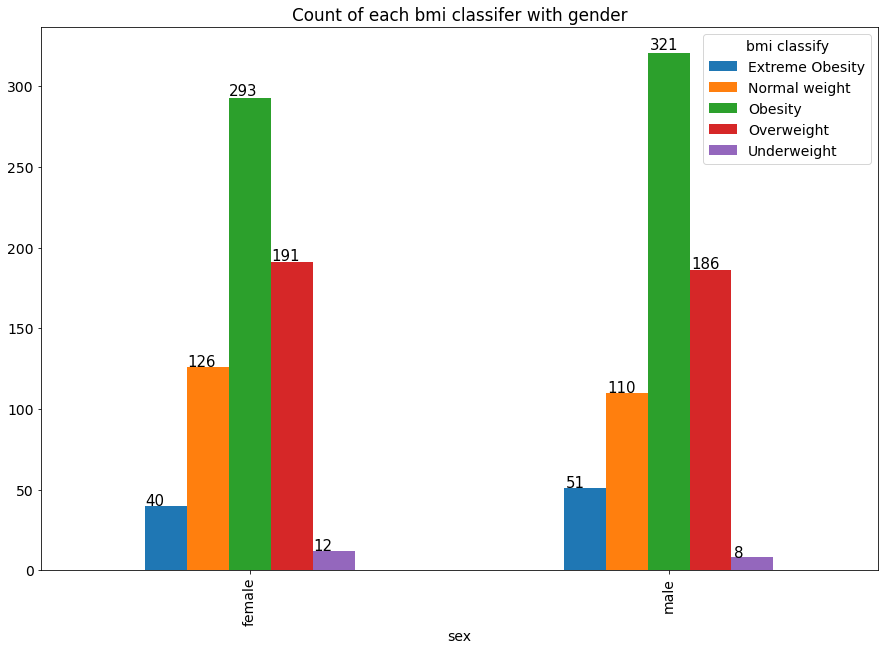

In [44]:
CrosstabResult=pd.crosstab(index=df['sex'],columns=df['bmi classify'])
ax = CrosstabResult.plot.bar(figsize=(15,10),title='Count of each bmi classifer with gender')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=15)

## Insights
### Females have higher frequeny in underweight, normal weight and overweight.
### Males have higher frequency in obesity and Extreme obesity.

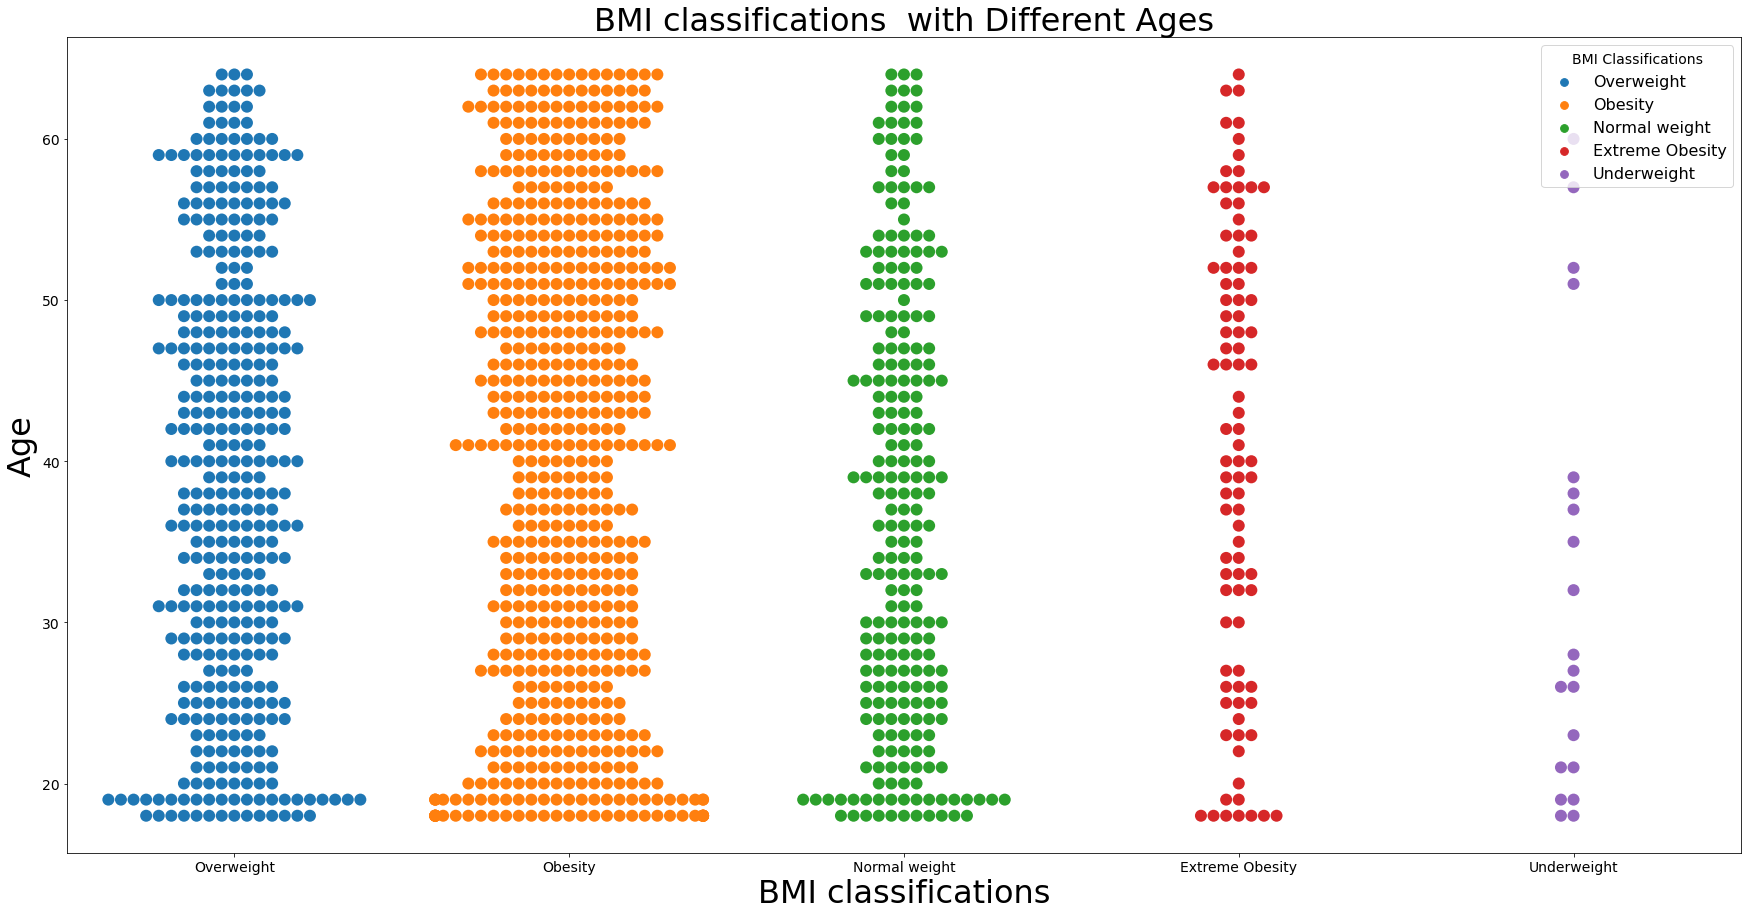

In [45]:
sns.swarmplot(y=df['age'],x=df['bmi classify'],hue=df['bmi classify'],size=12)
plt.title('BMI classifications  with Different Ages',fontsize=32)
plt.xlabel('BMI classifications',fontsize=32)
plt.ylabel('Age',fontsize=32)
plt.legend(fontsize=16,title='BMI Classifications')

## Insights

### all ages have members affected with overweight and obesity.
### distribution of normal weight in age of 18 to 30 is slighty bigger.
### biggest count of extreme obesity is in age of 18.
### biggest count of overweight is in age of 19.
### some ages is not effected by extreme obesity and underweight. (this can be beause there is enough data samples in these classifications. )
### underweight is showed when age is under 40 or bigger then 50.

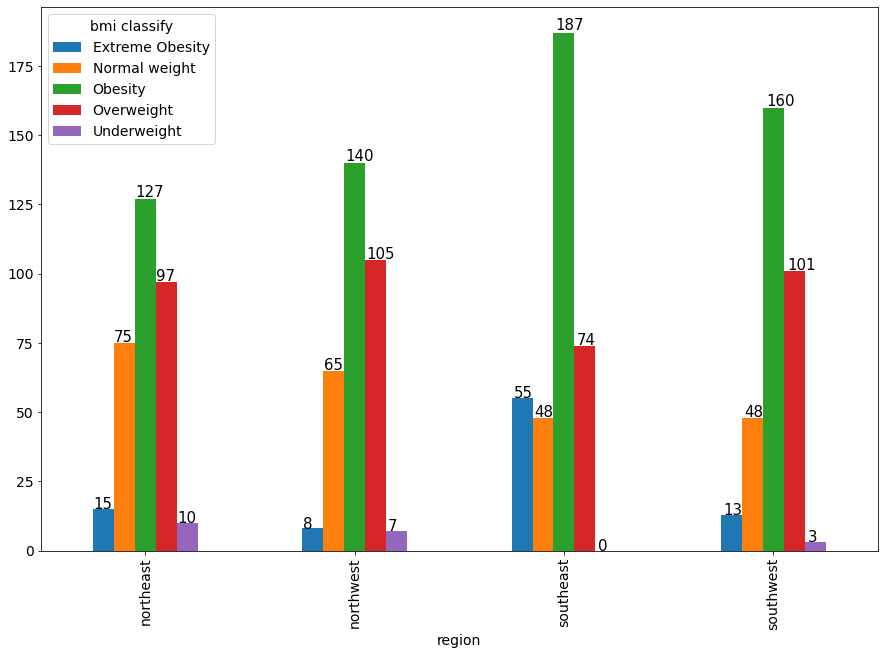

In [46]:
CrosstabResult=pd.crosstab(index=df['region'],columns=df['bmi classify'])
ax = CrosstabResult.plot.bar(figsize=(15,10))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=15)

## Insights 

### southeast has the highest count of obesity and extreme obesity, and has no count of underweight.
### northeast has the highest count of underweight and normal weight.
### northwest has the highest count of overweight.

In [47]:
df.groupby(['bmi classify']).agg({'charges':['mean','max','min']})

charges                        
                         mean          max        min
bmi classify                                         
Extreme Obesity  16784.615546  63770.42801  1146.7966
Normal weight    10428.947429  35069.37452  1121.8739
Obesity          15383.409803  62592.87309  1131.5066
Overweight       10993.994037  38245.59327  1252.4070
Underweight       8852.200585  32734.18630  1621.3402

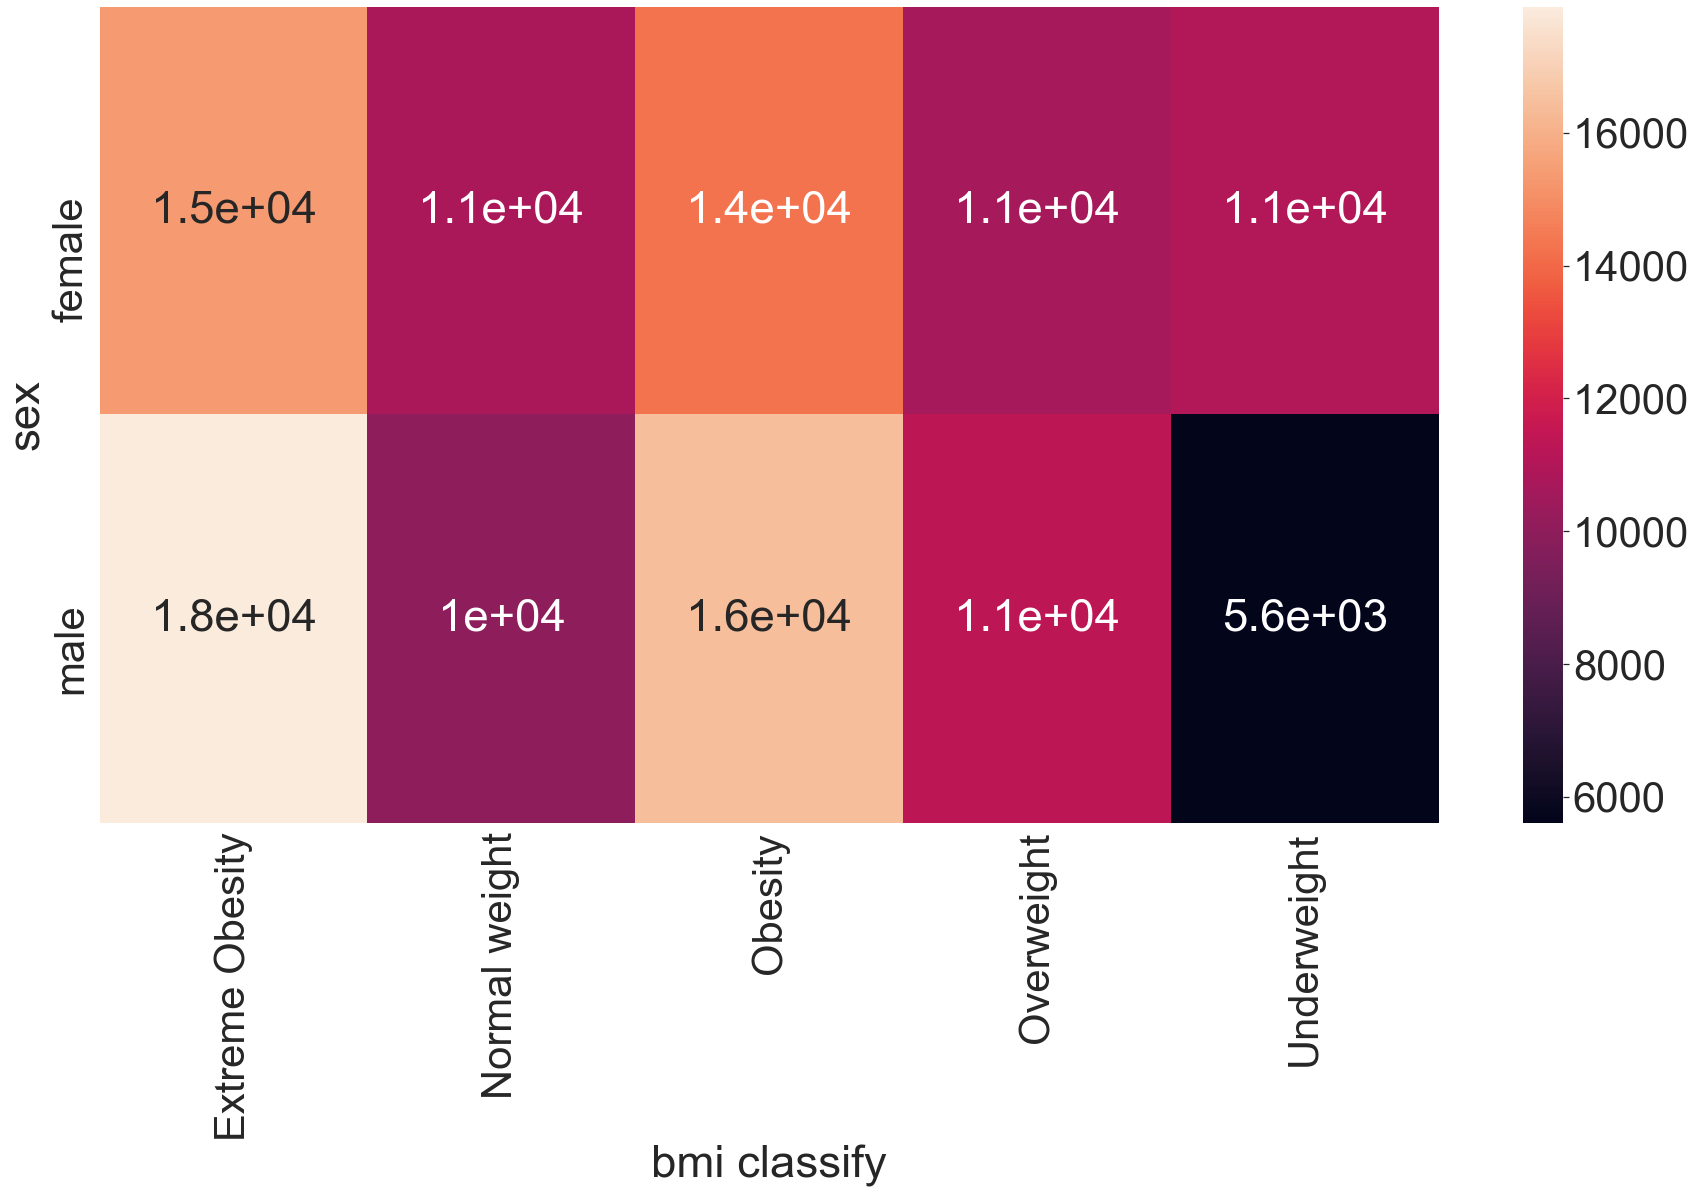

In [195]:
hm = df.groupby(['sex','bmi classify']).agg({'charges':'mean'}).reset_index()
hm = hm.pivot('sex', "bmi classify", "charges")
sns.heatmap(hm,  annot=True)
sns.set(font_scale=1.8) 

### males with obesity or extreme obesity have higher charges  avarage then females in same classification.
### males with underweight have the lowest charges avarage.
### females with underweight  have higher charges avarage then males.
### males and females with normal weight have close charges avarge.

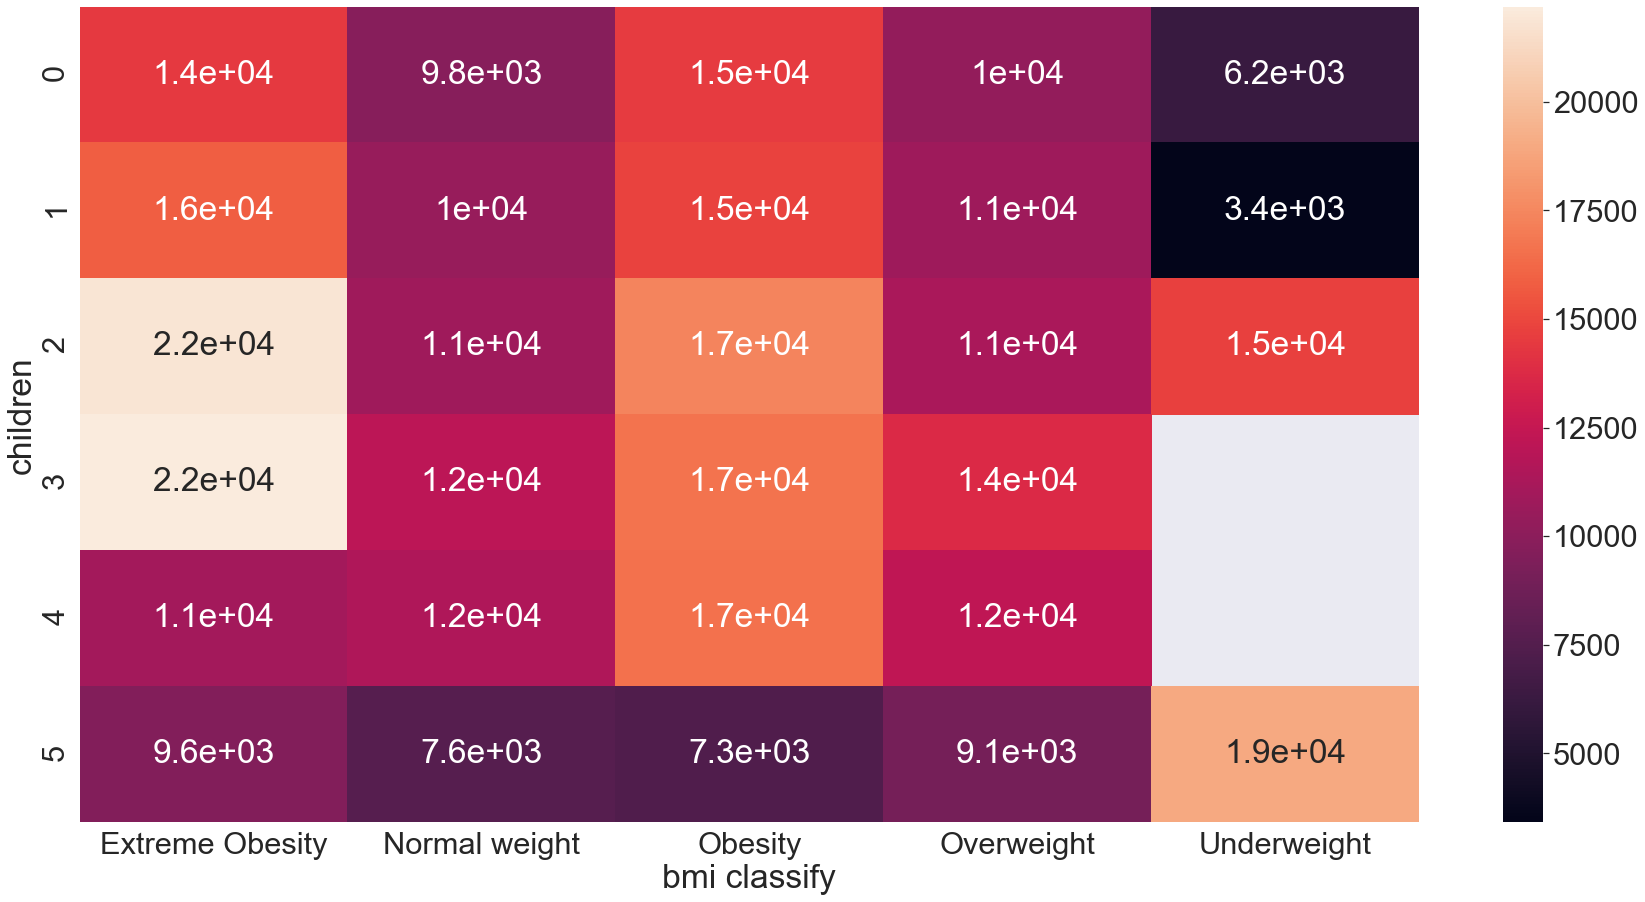

In [196]:
hm = df.groupby(['children','bmi classify']).agg({'charges':'mean'}).reset_index()
hm = hm.pivot('children', "bmi classify", "charges")
sns.heatmap(hm,  annot=True)
sns.set(font_scale=1.8) 

### Data samples with 2 or 3 children and have extreme obesity have high avarge of charges. 
### Data samples with 1 child and with underweight have low avarge of charge.
### Data samples with 5 children and underwight have high avarage of charges.
### There is no data samples with people have 3 or 4 children and have underwight.

In [50]:
df.loc[(df['bmi classify']=='Underweight') & ((df['children']==3) | (df['children']==4))]

,age,sex,bmi,children,smoker,region,charges,bmi classify


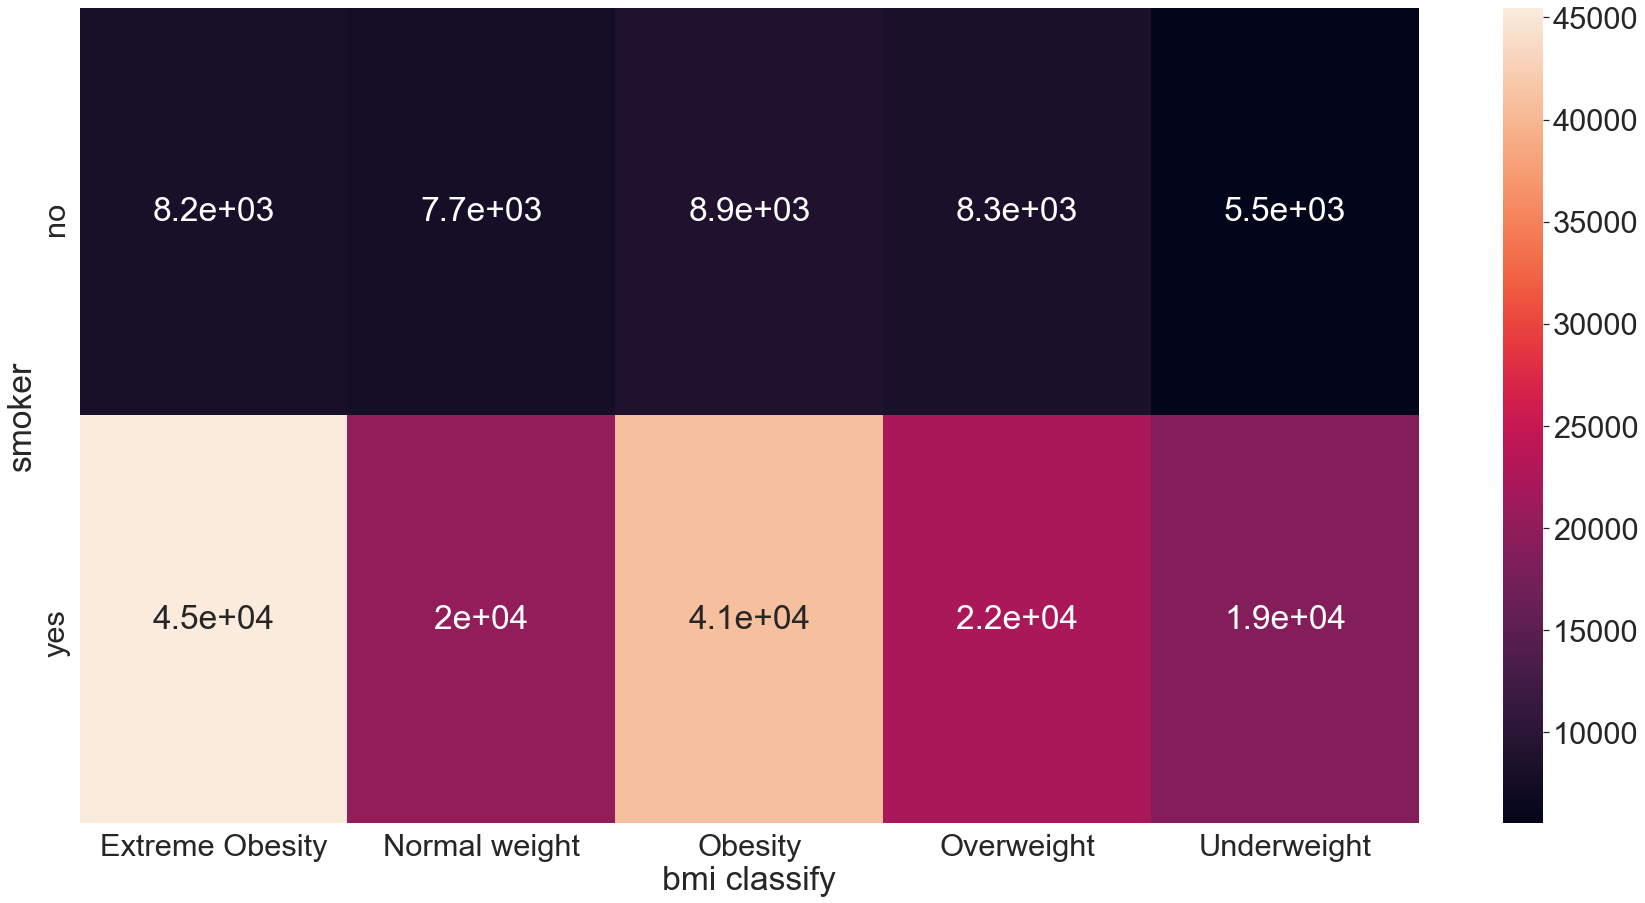

In [197]:
hm = df.groupby(['smoker','bmi classify']).agg({'charges':'mean'}).reset_index()
hm = hm.pivot('smoker', "bmi classify", "charges")
sns.heatmap(hm,  annot=True)
sns.set(font_scale=1.8) 

### Avarage Charges of smoker are higher then non-smokers in all BMI classifications.
### Smoker with extreme obesity have the highest avarage of charges.
### In second come the smokers with Obesity.
### Avarage charges of non-smoker with all BMI classification didnot exceed 10,000.

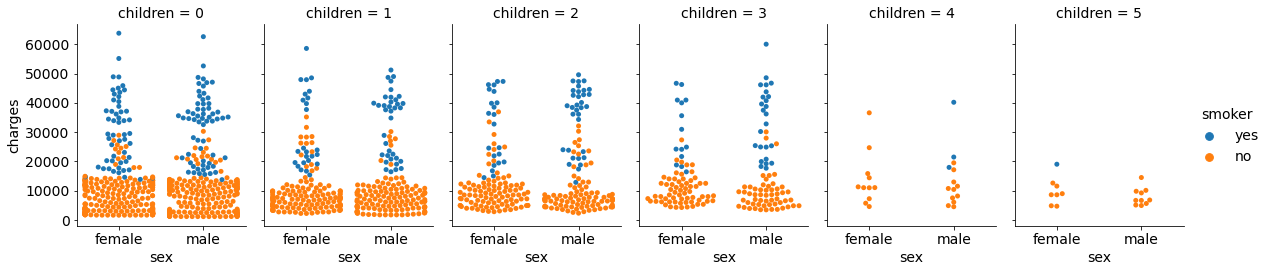

In [52]:
sns.catplot(x="sex", y="charges",hue="smoker", col="children", data=df, kind="swarm",height=4, aspect=.7);

### smokers charges are always high regardless of children count or gender.
### we noticed that there is no females smoker with 4 children.
### there is one female smoker with 5 children no males smokers with 5 children.

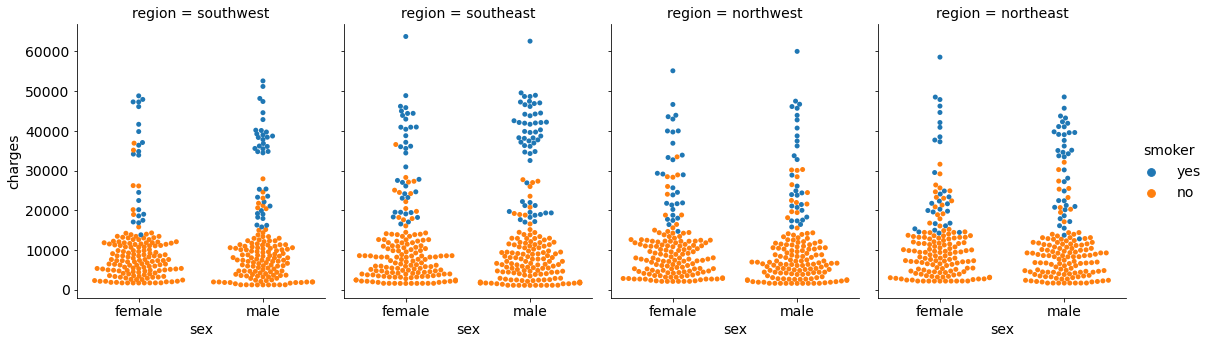

In [53]:
sns.catplot(x="sex", y="charges",
...                 hue="smoker", col="region",
...                 data=df, kind="swarm",
...                 height=5, aspect=0.8);

### Smokers charges are high in alll regions.

# Data Preparation

before applying any ML models we have to insure of shape of data.

we have the columns sex,smoker,region need to be replaced with numeric values.

In [54]:
df_edited = df.copy()

In [55]:
df_edited['sex'].replace({'male':'0','female':'1'},inplace=True)

In [56]:
df_edited['smoker'].replace({'no':'0','yes':'1'},inplace=True)

In [57]:
df_edited['bmi classify'].unique()

array(['Overweight', 'Obesity', 'Normal weight', 'Extreme Obesity',
       'Underweight'], dtype=object)

In [58]:
df_edited['bmi classify'].replace({'Underweight':'0','Normal weight':'1','Overweight':'2','Obesity':'3','Extreme Obesity':'4'},inplace=True)

In [59]:
df_edited['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [60]:
df_edited['region'].replace({'southwest':'0','southeast':'1','northwest':'2','northeast':'3'},inplace=True)

df_edited['region']=df_edited['region'].astype(object)
df_edited['region'].replace({'0':'southwest','1':'southeast','2':'northwest','3':'northeast'},inplace=True)
df_edited = pd.get_dummies(df_edited, columns=['region'])

# Feature Selection

* In order to view the correlation among the features all the data should be float, so we gonna convert the object types into float, then visulizing the correlation using heatmeap.

* This will help in deciding which features will be used as predicators in the model.

### Set data type to float

In [61]:
df_edited['sex']=df_edited['sex'].astype(float)
df_edited['smoker']=df_edited['smoker'].astype(float)
df_edited['region']=df_edited['region'].astype(float)
df_edited['bmi classify']=df_edited['bmi classify'].astype(float)

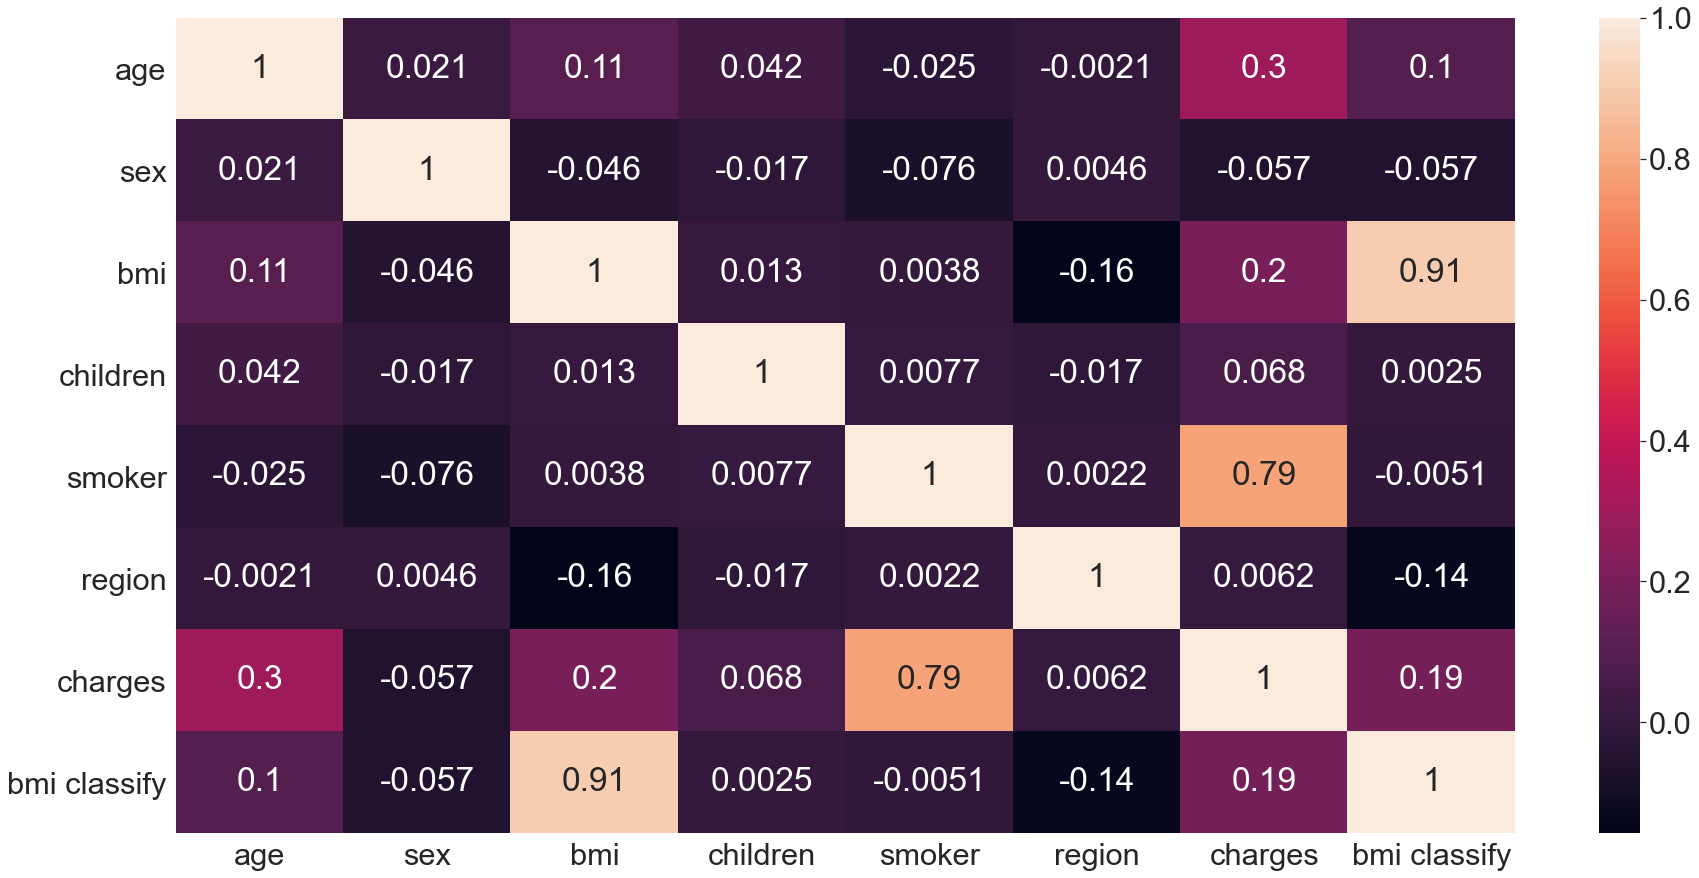

In [199]:
sns.heatmap(df_edited.corr(), annot=True)
sns.set(font_scale=1.8) 

# Insights

### We see high correlation between the charges and smoker feature.
### In second we find age,bmi and bmi classify have weak correlation with charges.
### Children and region have a very weak correlation with the charges
### In the other way there almost no correlation between sex and charges.


# Feature Selection

We only gonna chose the feature with high correlation with charges, in order to predict the charges.(indepandent)

And the charges will be the depandent feature.

### Checking for multicollinearity

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df2_before = df_edited
df2_after = df_edited.drop('bmi classify',1)

X1 = sm.add_constant(df2_before)
X2 = sm.add_constant(df2_after)

series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)
display(series_before)
display(series_after)

const           62.295032
age              1.374997
sex              1.010463
bmi              5.775606
children         1.012515
smoker           3.559594
region           1.030230
charges          4.038738
bmi classify     5.747784
dtype: float64

const       42.967588
age          1.372866
sex          1.009006
bmi          1.153126
children     1.011617
smoker       3.536099
region       1.030143
charges      4.011830
dtype: float64

In [114]:
Y = df_edited['charges']

In [115]:
X = df_edited[['age','bmi','smoker']]

# Feature Transformation

in order to prevent the model from being effected by large number of feature we gonna scale the values in range of 0,1.

In [116]:
def scaling(col):
  data = asarray(col)
  scaler = StandardScaler()
  data = data.reshape(-1,1)
  scaled = scaler.fit_transform(data)
  return scaled

In [117]:
X1 =X.copy()
X1['age']=scaling(X1['age'])
X1['bmi']=scaling(X1['bmi'])

# Linear Regression model

#### The model will predict the charges of insurance, depanding on the smoking, bmi, and age features (as predicators).


### First: Spliting the data into traing and testing

* 80% of data is for training and 20% for testing

In [118]:
x_train, x_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2)

### Second: Model building

In [119]:
charges_prediction_model = LinearRegression().fit(x_train,y_train)


### Third: Model Prediction

In [130]:
y_predict = charges_prediction_model.predict(x_test)

In [131]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
result

,Actual,Predicted
1011,18767.73770,29456.671324
849,10601.63225,13313.105781
68,5920.10410,10413.683742
305,19442.35350,6611.531905
1113,5312.16985,4144.460507
...,...,...
503,32548.34050,26276.288546
1047,44501.39820,34065.986136
356,8944.11510,14413.767437
911,33732.68670,26475.341085


### Forth: Model evaluation

In [132]:
charges_prediction_model.intercept_ 

8472.399455931883

In [133]:
x1 = sm.add_constant(X1)

model1 = sm.OLS(Y, x1)

mev= model1.fit()

In [134]:
mev.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Wed, 14 Jul 2021   Prob (F-statistic):               0.00
Time:                        00:48:27   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8391.7305    186.785     44.927      0.000    8025.307    8758.155
age         3645.2690    167.612     21.748      0.000    3316.457    3974.081
bmi         1966.6321    167.561     11.737      0.000    1637.921    2295.343
smoker      2.382e+04    412.867     57.703      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      299.709   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.137
Skew:                           1.213   Prob(JB):                    6.25e-155
Kurtosis:                       5.618   Cond. No.                         2.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
print('Mean Sequared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('RootMean Squared Error:', math.sqrt( metrics.mean_absolute_error(y_test, y_predict)))

Mean Sequared Error: 39023292.06479127
Mean Absolute Error: 4467.642547658408
RootMean Squared Error: 66.84042599848095


In [145]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))


R2: 0.78


# Regression Decision Tree

### Model Building and Predication

In [139]:
from sklearn.tree import DecisionTreeRegressor

DTR1 = DecisionTreeRegressor(max_depth=4)

DTR1.fit(x_train, y_train)

y = DTR1.predict(x_test)

In [140]:
result1 = pd.DataFrame({'Actual': y_test, 'Predicted': y})
result1

,Actual,Predicted
214,8520.02600,22867.262435
1075,4562.84210,13054.985458
1060,1981.58190,7220.935444
653,8527.53200,5481.145956
885,19719.69470,5481.145956
...,...,...
228,7358.17565,36346.315813
537,8825.08600,36346.315813
731,10065.41300,9396.515597
936,32108.66282,36346.315813


### Model Evaluation

In [147]:
print('Mean Sequared Error:', metrics.mean_squared_error(y_test, y))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y))
print('RootMean Squared Error:', math.sqrt( metrics.mean_absolute_error(y_test, y)))


Mean Sequared Error: 19488546.78508822
Mean Absolute Error: 2644.136803627025
RootMean Squared Error: 51.421170772620734


In [146]:
model_r2 = r2_score(y_test, y)
print("R2: {:.2}".format(model_r2))

R2: 0.89


# Random Forest Regressor

In [163]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x_train, y_train)  
Y_pred = regressor.predict(x_test)

model_r2 = r2_score(y_test, Y_pred)
print("R2: {:.2}".format(model_r2))

R2: 0.85


In [200]:
result1 = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
result1

,Actual,Predicted
1011,18767.73770,20004.242617
849,10601.63225,12108.162554
68,5920.10410,8783.848105
305,19442.35350,4701.947671
1113,5312.16985,4423.253855
...,...,...
503,32548.34050,33469.012655
1047,44501.39820,41337.594760
356,8944.11510,8673.030233
911,33732.68670,34682.493091


# Conclusion
   ## We can see the regression decision tree model has better. 
   ## in second come the RandomForest Regression
   ## where perfromane of multiple linear regression model was the lowest.
   
# Explination
###  RDT works better with non-linear relationship among feature not as MLR.
### we used the RFR in order to bootstap the data to see it can produce better performance by solving the imbalance of some features as smoking dataset.

# Classification

### Instead of performing feature construction on the dataset we. can develop a model to predict where the new data  falls in which classsificatin. 

### as  known the most correlated feature with bmi classification is bmi value. so we will give the model only feature to predict the classification.

### the model that will be used for classification is decision tree.

In [148]:
x = df['bmi']

In [149]:
y = df['bmi classify']

In [151]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2,random_state=1)

In [155]:
DTM = DecisionTreeClassifier(max_depth=3)

DTM = DTM.fit(np.asarray(X_train).reshape(-1,1),np.asarray(Y_train).reshape(-1,1))

Y_predict = DTM.predict(np.asarray(X_test).reshape(-1,1))

In [156]:
result = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predict})
result

,Actual,Predicted
559,Obesity,Obesity
1087,Obesity,Obesity
1020,Obesity,Obesity
460,Obesity,Obesity
802,Normal weight,Normal weight
...,...,...
682,Obesity,Obesity
629,Obesity,Obesity
893,Obesity,Obesity
807,Obesity,Obesity


Text(0.5, 110.0, 'Predicted label')

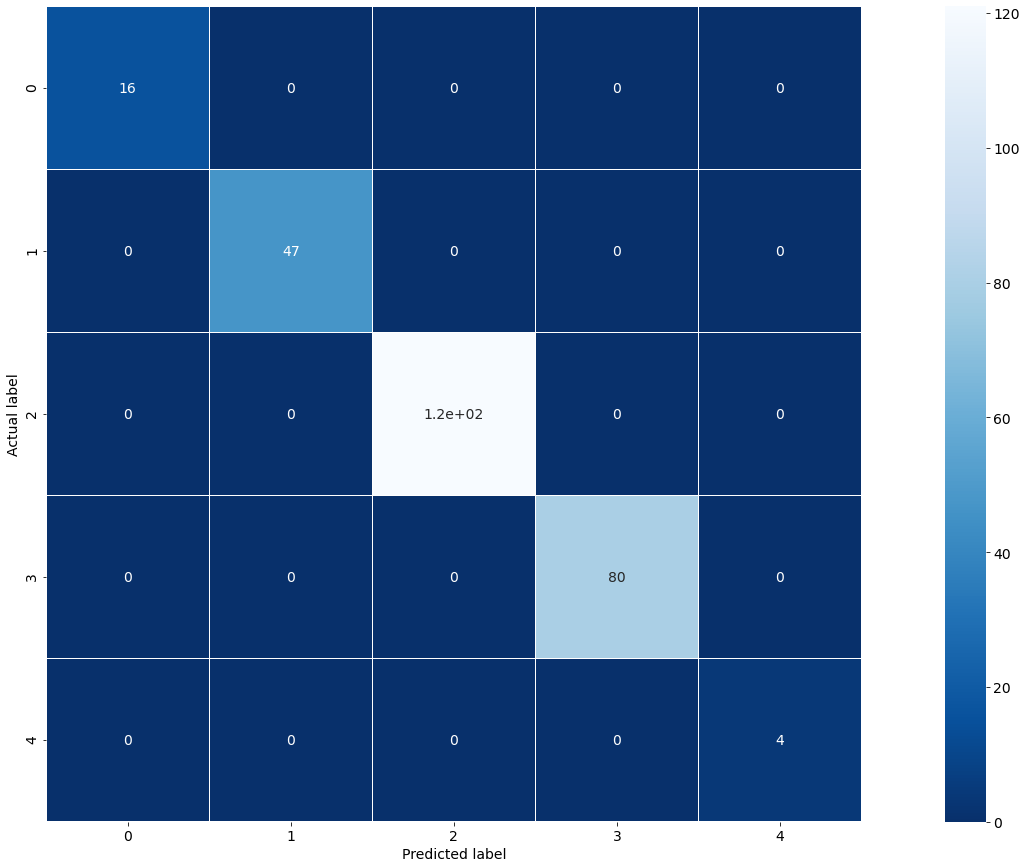

In [157]:
cm = metrics.confusion_matrix(Y_test, Y_predict)
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [158]:
cm

array([[ 16,   0,   0,   0,   0],
       [  0,  47,   0,   0,   0],
       [  0,   0, 121,   0,   0],
       [  0,   0,   0,  80,   0],
       [  0,   0,   0,   0,   4]])

In [160]:
print(classification_report(Y_test, Y_predict))

                 precision    recall  f1-score   support

Extreme Obesity       1.00      1.00      1.00        16
  Normal weight       1.00      1.00      1.00        47
        Obesity       1.00      1.00      1.00       121
     Overweight       1.00      1.00      1.00        80
    Underweight       1.00      1.00      1.00         4

       accuracy                           1.00       268
      macro avg       1.00      1.00      1.00       268
   weighted avg       1.00      1.00      1.00       268



# Conclusion
## The model easily determined the pattern in the feature and correctly predicate all the test data.